In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as mdates
import re
import os
import datetime
import plotly
import warnings
import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
from sklearn import preprocessing

In [399]:
#from google.colab import drive
#drive.mount('/content/drive')

In [400]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

In [401]:
# Set the global default size of matplotlib figures
plt.figure(figsize=(16,8))
plt.rc('figure', figsize=(16,8))


<Figure size 1152x576 with 0 Axes>

In [402]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

#show_dataframe_info()

def SetColor(x):
    if isinstance(x, float):
        if(x <= 12):
            return "green"
        elif(x > 12 and x <= 35.4):
            return "yellow"
        elif(x >35.4 and x <= 55.4 ):
            return "orange"
        elif(x >55.4 and x <= 150.4 ):
            return "red"
        elif(x > 150.4  and x <= 250.4 ):
            return "purple"
        elif(x > 250.4):
            return "maroon"
        #else:
            #return "black"
            
def remove_special_characters(original_string):
    cleaned_string = re.sub('[^A-Za-z0-9_-]+', '', original_string)
    return cleaned_string

def create_directory(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        
def make_simple_line_chart(x_axis_data,y_axis_data, x_axis_label,y_axis_label, chart_title, saved_fig_full_filepath='chart'):
    fig = plt.figure(figsize=(24,12))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    ax = fig.add_subplot(111)
    plt.plot(x_axis_data, y_axis_data, color='blue', marker='o', linestyle='solid')
    plt.title(chart_title, fontsize=20)
    plt.ylabel(y_axis_label, fontsize=20)
    plt.xlabel(x_axis_label,fontsize=20)
    
    hours = mdates.HourLocator(interval = 1)
    hour_format = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hour_format)
    
      ##coloring
    ax.axhspan(0, 12, facecolor='green')
    ax.axhspan(12, 35.4, facecolor='yellow')
    ax.axhspan(35.4, 55.4, facecolor='orange')
    ax.axhspan(55.4, 150.4, facecolor='red')
    ax.axhspan(150.4, 250.4, facecolor='purple')
    ax.axhspan(250.4, 500.4, facecolor='maroon')
    
    plt.show()
    fig.savefig(saved_fig_full_filepath + '.png')
    
    
def  generate_dates(number_of_days_to_subtract_from_currentdate):
    current_date = datetime.datetime.now()
    specified_date = current_date - datetime.timedelta(days =number_of_days_to_subtract_from_currentdate)
    return specified_date.strftime('%Y-%m-%d')
    
    

### Reading in greenness and airquality data for preprocessing

- uncomment the location you would like to preprocess below.


In [403]:
root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'
vi_base_dir ='data\Modis'

airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','makerere_6f.csv'))
vi_data = pd.read_csv(os.path.join(vi_base_dir,'makerere-vi-2017-2019','makerere-vi-2017-2019-MOD13A3-006-results.csv'))
filepath = os.path.join(base_dir,'Makerere')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','bugolobi.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'bugolobi_vi_2017_2019','bugolobi-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','mulago.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'mulago-vi-2017-2019','Mulago-actual-coordinates-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath= os.path.join(base_dir,'Mulago')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','makindye_rainbow_international_school.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'makindye-vi-2017-2019','makindye-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath = os.path.join(base_dir, 'Makindye')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','bukoto_kisu.csv'))
#vi_data = pd.read_csv(os.path.join(vi_base_dir,'bukoto-vi-2017-2019','bukoto-final-vi-2017-2019-MOD13A3-006-results.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)')


airquality_data.head(10)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.



,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7
0,2017-09-04 09:48:04 EAT,1,8.53,9.82,16.13,1.39,0.0,0.0,4.38
1,2017-09-04 09:49:10 EAT,2,8.46,9.94,12.15,1.39,1000.0,1000.0,4.37
2,2017-09-04 09:50:10 EAT,3,8.64,10.07,11.58,1.39,1000.0,1000.0,4.36
3,2017-09-04 09:52:16 EAT,4,8.66,10.22,12.16,1.39,1000.0,1000.0,4.35
4,2017-09-04 09:53:18 EAT,5,7.96,9.3,10.98,1.39,1000.0,1000.0,4.34
5,2017-09-04 09:54:21 EAT,6,7.86,9.28,10.17,1.39,1000.0,1000.0,4.34
6,2017-09-04 09:55:18 EAT,7,7.82,9.17,10.12,1.39,1000.0,1000.0,4.34
7,2017-09-04 09:56:20 EAT,8,7.4,8.7,9.19,1.39,1000.0,1000.0,4.32
8,2017-09-04 10:01:34 EAT,9,6.59,7.85,8.78,1.39,1000.0,1000.0,4.30
9,2017-09-04 10:02:34 EAT,10,6.86,8.08,8.37,1.39,1000.0,1000.0,4.29


In [404]:
print(airquality_data.columns)
airquality_data.rename(columns={'field1':'PM1(Ug/m3)','field2':'PM2.5(Ug/m3)',
                                     'field3':'PM10(Ug/m3)', 'field4':'Sample period',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage'
                                     },inplace=True)


Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7'],
      dtype='object')


In [405]:
airquality_data.head()

,created_at,entry_id,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),Sample period,Latitude,Longitude,Battery Voltage
0,2017-09-04 09:48:04 EAT,1,8.53,9.82,16.13,1.39,0.0,0.0,4.38
1,2017-09-04 09:49:10 EAT,2,8.46,9.94,12.15,1.39,1000.0,1000.0,4.37
2,2017-09-04 09:50:10 EAT,3,8.64,10.07,11.58,1.39,1000.0,1000.0,4.36
3,2017-09-04 09:52:16 EAT,4,8.66,10.22,12.16,1.39,1000.0,1000.0,4.35
4,2017-09-04 09:53:18 EAT,5,7.96,9.3,10.98,1.39,1000.0,1000.0,4.34


In [406]:
airquality_data.tail()

,created_at,entry_id,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),Sample period,Latitude,Longitude,Battery Voltage
232496,2019-04-30 09:19:01 EAT,232497,2.27,2.35,2.35,1.39,0.332240,32.569889,4.50
232497,2019-04-30 09:20:10 EAT,232498,2.61,2.73,2.73,1.39,0.332330,32.569927,4.48
232498,2019-04-30 09:21:19 EAT,232499,2.36,2.45,2.45,1.39,0.332323,32.569908,4.50
232499,2019-04-30 09:22:34 EAT,232500,2.29,2.6,2.81,1.39,0.332236,32.569859,4.49
232500,2019-04-30 09:23:43 EAT,232501,2.39,2.47,2.47,1.39,0.332241,32.569881,4.50


In [407]:
show_dataframe_info(airquality_data)

(232501, 9)
['created_at', 'entry_id', 'PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'Sample period', 'Latitude', 'Longitude', 'Battery Voltage']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232501 entries, 0 to 232500
Data columns (total 9 columns):
created_at         232501 non-null object
entry_id           232501 non-null int64
PM1(Ug/m3)         232501 non-null object
PM2.5(Ug/m3)       232501 non-null object
PM10(Ug/m3)        232501 non-null object
Sample period      232501 non-null object
Latitude           232501 non-null float64
Longitude          232501 non-null float64
Battery Voltage    232501 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 16.0+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at          object
entry_id             int64
PM1(Ug/m3)          object
PM2.5(Ug/m3)        object
PM10(Ug/m3)         object
Sample period       object
Latitude           float64
Longitude          float64
Battery Voltage    float64
dty

In [408]:
airquality_data.describe()

,entry_id,Latitude,Longitude,Battery Voltage
count,232501.000000,232501.000000,232501.000000,232501.000000
mean,116251.000000,3.261173,35.387023,4.309619
std,67117.401806,54.023214,52.287271,0.284668
min,1.000000,0.000000,0.000000,3.070000
25%,58126.000000,0.332247,32.569878,4.290000
50%,116251.000000,0.332282,32.569912,4.430000
75%,174376.000000,0.332326,32.569942,4.460000
max,232501.000000,1000.000000,1000.000000,5.000000


Now that we have a general idea of the data set contents, we can dive deeper into each column. We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning and deeplearning algorithms.

Plot a few features to get a better idea of each:



### Drop columns that shall not be used during analysis
- entry_id
- Battery Voltage
- Latitiude
- Longitude
- Sample Period

In [409]:
airquality_data_of_interest = airquality_data.drop(['entry_id','Latitude', 'Longitude', 
                                                    'Battery Voltage','Sample period'], axis=1)

In [410]:
airquality_data_of_interest.shape
show_dataframe_info(airquality_data_of_interest)

(232501, 4)
['created_at', 'PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232501 entries, 0 to 232500
Data columns (total 4 columns):
created_at      232501 non-null object
PM1(Ug/m3)      232501 non-null object
PM2.5(Ug/m3)    232501 non-null object
PM10(Ug/m3)     232501 non-null object
dtypes: object(4)
memory usage: 7.1+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at      object
PM1(Ug/m3)      object
PM2.5(Ug/m3)    object
PM10(Ug/m3)     object
dtype: object


#### Ensure to convert all column values to float. there certain columns like pm1 and pm10 that have values which are not floats
  Utiliy method goes through all the values in the columns and checks if they are float if not it tries to convert them to float if they fail, it makes the value NaN.

In [411]:
cols_to_convert_to_float = ['PM1(Ug/m3)','PM2.5(Ug/m3)','PM10(Ug/m3)']
for col in cols_to_convert_to_float:
    airquality_data_of_interest[col] = pd.to_numeric(airquality_data_of_interest[col], errors='coerce')

### Convert data into timeseries dataframe with datetime being the index

In [412]:
#parsing the created_at field into a datetime object
airquality_data_of_interest["TimeStamp"] = pd.to_datetime(airquality_data_of_interest["created_at"])

is_utc_date = airquality_data_of_interest['created_at'].loc[0]
print(is_utc_date)

if "UTC" in is_utc_date:
    print('utc found')
    airquality_data_of_interest["TimeStamp"] = airquality_data_of_interest["TimeStamp"]+ datetime.timedelta(hours=3)

    
time_indexed_data = airquality_data_of_interest.set_index('TimeStamp')
time_indexed_data = time_indexed_data.drop(['created_at'], axis=1)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\dateutil\parser\_parser.py:1204: UnknownTimezoneWarning:

tzname EAT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



2017-09-04 09:48:04 EAT


In [413]:
time_indexed_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-09-04 09:48:04,8.53,9.82,16.13
2017-09-04 09:49:10,8.46,9.94,12.15
2017-09-04 09:50:10,8.64,10.07,11.58
2017-09-04 09:52:16,8.66,10.22,12.16
2017-09-04 09:53:18,7.96,9.30,10.98


### Filter out outliers and remain with records with pm2.5 less than 500.4 and records with pm2.5 values  greater than zero

In [414]:
time_indexed_data = time_indexed_data[time_indexed_data['PM2.5(Ug/m3)'] <= 500.4]
time_indexed_data = time_indexed_data[time_indexed_data['PM2.5(Ug/m3)'] > 0]
print(time_indexed_data.shape)
time_indexed_data.max()
time_indexed_data.min()
#time_indexed_data = time_indexed_data.where(time_indexed_data[time_indexed_data['PM2.5(Ug/m3)'] <= 500.4], other=(hourly_average_airquality_data_concentrations.fillna(method='ffill')+hourly_average_airquality_data_concentrations.fillna(method='bfill'))/2)

(232001, 3)


PM1(Ug/m3)      0.00
PM2.5(Ug/m3)    0.01
PM10(Ug/m3)     0.01
dtype: float64

## Visualize the entire dataset pm2.5 timeseries

### Compute average hourly, daily, monthly concentration values (mean of the concentrations for each hour)
- parse the created_at column into datetime.
- set the created_at column to be the index for the dataframe.
- calculate the corresponding means for hourly, daily and monthly

In [415]:
hourly_average_airquality_data_concentrations = time_indexed_data.resample('H').mean().round(2) #.dropna(axis=0)
hourly_maximum_airquality_data_concentrations  = time_indexed_data.resample('H').max().round(2)#.dropna(axis=0)
hourly_minimum_airquality_data_concentrations  = time_indexed_data.resample('H').min().round(2)#.dropna(axis=0)

daily_average_airquality_data_concentrations  = time_indexed_data.resample('D').mean().round(2)#.dropna(axis=0)
daily_maximum_airquality_data_concentrations  = time_indexed_data.resample('D').max().round(2)#.dropna(axis=0)
daily_minimum_airquality_data_concentrations  = time_indexed_data.resample('D').min()#.dropna(axis=0)

monthly_average_airquality_data_concentrations  = time_indexed_data.resample('M').mean().round(2) #.dropna(axis=0)


hourly_average_airquality_data_concentrations.head()

#hourly has alot of NaNs, need to find out why.
#drop nans
monthly_average_airquality_data_concentrations_analysis= monthly_average_airquality_data_concentrations.dropna(axis=0)
hourly_average_airquality_data_concentrations_analysis  = hourly_average_airquality_data_concentrations.dropna(axis=0)
daily_average_airquality_data_concentrations_analysis  =  daily_average_airquality_data_concentrations.dropna(axis=0)

In [416]:
daily_average_airquality_data_concentrations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-09-04,6.79,8.08,11.25
2017-09-05,NaN,NaN,NaN
2017-09-06,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN
2017-09-08,NaN,NaN,NaN
2017-09-09,NaN,NaN,NaN
2017-09-10,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN
2017-09-12,NaN,NaN,NaN


In [417]:
print(daily_average_airquality_data_concentrations.size)
#daily_airquality_data_concentrations.isnull()
daily_average_missing_airquality_data = daily_average_airquality_data_concentrations[daily_average_airquality_data_concentrations.isnull()]
#df_null = daily_airquality_data_concentrations[daily_airquality_data_concentrations.notnull().any(axis=1)]

1812


### Display information related to dataframe  after 24-hr-average(daily) and monthly average

In [418]:
show_dataframe_info(daily_average_airquality_data_concentrations)

(604, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2017-09-04 to 2019-04-30
Freq: D
Data columns (total 3 columns):
PM1(Ug/m3)      399 non-null float64
PM2.5(Ug/m3)    399 non-null float64
PM10(Ug/m3)     399 non-null float64
dtypes: float64(3)
memory usage: 18.9 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [419]:
daily_average_airquality_data_concentrations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-09-04,6.79,8.08,11.25
2017-09-05,NaN,NaN,NaN
2017-09-06,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN
2017-09-08,NaN,NaN,NaN
2017-09-09,NaN,NaN,NaN
2017-09-10,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN
2017-09-12,NaN,NaN,NaN


In [420]:
show_dataframe_info(daily_average_airquality_data_concentrations)

(604, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2017-09-04 to 2019-04-30
Freq: D
Data columns (total 3 columns):
PM1(Ug/m3)      399 non-null float64
PM2.5(Ug/m3)    399 non-null float64
PM10(Ug/m3)     399 non-null float64
dtypes: float64(3)
memory usage: 18.9 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [421]:
show_dataframe_info(monthly_average_airquality_data_concentrations)

(20, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-09-30 to 2019-04-30
Freq: M
Data columns (total 3 columns):
PM1(Ug/m3)      19 non-null float64
PM2.5(Ug/m3)    19 non-null float64
PM10(Ug/m3)     19 non-null float64
dtypes: float64(3)
memory usage: 640.0 bytes

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [422]:
monthly_average_airquality_data_concentrations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-09-30,7.440000e+00,9.01,13.39
2017-10-31,3.152749e+17,13.98,31.67
2017-11-30,NaN,NaN,NaN
2017-12-31,1.382000e+01,18.37,46.48
2018-01-31,1.734000e+01,24.71,56.06
2018-02-28,6.820000e+00,8.88,20.08
2018-03-31,3.550000e+00,4.38,5.75
2018-04-30,1.900000e+00,2.23,3.04
2018-05-31,6.830000e+00,7.82,12.13


### filling in the missing values with the average of the value after and before 

In [423]:
monthly_average_airquality_data_concentrations = monthly_average_airquality_data_concentrations.where(monthly_average_airquality_data_concentrations.notnull(), other=(monthly_average_airquality_data_concentrations.fillna(method='ffill')+monthly_average_airquality_data_concentrations.fillna(method='bfill'))/2)
daily_average_airquality_data_concentrations = daily_average_airquality_data_concentrations.where(daily_average_airquality_data_concentrations.notnull(), other=(daily_average_airquality_data_concentrations.fillna(method='ffill')+daily_average_airquality_data_concentrations.fillna(method='bfill'))/2)

### Visualize the daily  pm2.5 concentration timeseries

In [424]:
print(daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].size)
y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values
print(y.size)

604
604


In [425]:
##remove nan for visualizations 
#y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna()
y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values
pm25 = go.Scatter(x=daily_average_airquality_data_concentrations.dropna().index,
                  y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values, 
                  mode='markers',
                  marker = dict(color=list(map(SetColor, y)),size=15)
                  
                 ) 

layout = go.Layout(title='Daily Average PM2.5 Concentration', xaxis=dict(title='Date'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[pm25], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'daily_average_pm25_concentration.png'))


In [426]:
average_daily_pm25 = go.Scatter(x=daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().index,
                         y = daily_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values,
                         #mode='lines+markers',
                         #marker = dict(color=list(map(SetColor, y_average)), size = 17),
                         name='Average Daily PM2.5 Concentration'
                         #hoverinfo = 'text',
                         #text=[f'PM2.5 Concentration: {x:.2f} ug/m3' for x in daily_average_airquality_data_concentrations['PM2.5(Ug/m3)']]
                 )

layout = go.Layout(title='Daily PM2.5 Concentration', xaxis=dict(title='Date'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[average_daily_pm25], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'daily_average_pm25_concentration_trend.png'))

### Visualize the monthly pm2.5 concentration

In [427]:
average_monthly_pm25 = monthly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].values
monthly_pm25 = go.Scatter(x=monthly_average_airquality_data_concentrations.index,
                         y = monthly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].values,
                         mode='lines+markers',
                         marker = dict(color=list(map(SetColor, average_monthly_pm25)), size = 17),
                 ) 

layout = go.Layout(title='Monthly Average PM2.5 ', xaxis=dict(title='Date(UTC)'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[monthly_pm25], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'monthly_average_pm25_concentration.png'))


In [428]:
monthly_pm25_trend = go.Scatter(x=monthly_average_airquality_data_concentrations.index,
                         y = monthly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].values,
                         #mode='lines+markers',
                        #marker = dict(color=list(map(SetColor, average_monthly_pm25)), size = 17),
                 ) 

layout = go.Layout(title='Monthly Average PM2.5 ', xaxis=dict(title='Date(UTC)'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[monthly_pm25_trend], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'monthly_average_pm25_concentration_trend.png'))


### Display the concentrations
- hourly pm2.5
- daily  pm2.5
- monthly pm2.5

### Visualize the hourly pm2.5 concentration

In [429]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(14473, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14473 entries, 2017-09-04 09:00:00 to 2019-04-30 09:00:00
Freq: H
Data columns (total 3 columns):
PM1(Ug/m3)      5267 non-null float64
PM2.5(Ug/m3)    5267 non-null float64
PM10(Ug/m3)     5267 non-null float64
dtypes: float64(3)
memory usage: 452.3 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [430]:
#hourly_airquality_data_concentrations['PM2.5(Ug/m3)'].max()

In [431]:
hourly_pm25_trend = go.Scatter(x=hourly_average_airquality_data_concentrations.dropna().index,
                         y = hourly_average_airquality_data_concentrations['PM2.5(Ug/m3)'].dropna().values,
                 ) 

layout = go.Layout(title='Hourly Average PM2.5', xaxis=dict(title='Date'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[hourly_pm25_trend], layout=layout)
iplot(fig)
pio.write_image(fig,os.path.join(filepath , 'hourly_average_pm25_concentration_trend.png'))


In [432]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(14473, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14473 entries, 2017-09-04 09:00:00 to 2019-04-30 09:00:00
Freq: H
Data columns (total 3 columns):
PM1(Ug/m3)      5267 non-null float64
PM2.5(Ug/m3)    5267 non-null float64
PM10(Ug/m3)     5267 non-null float64
dtypes: float64(3)
memory usage: 452.3 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


In [433]:
hourly_average_airquality_data_concentrations['hour'] = hourly_average_airquality_data_concentrations.index.hour
hourly_average_airquality_data_concentrations['Hour']= pd.to_timedelta(hourly_average_airquality_data_concentrations['hour'],unit='h')

hourly_average_airquality_data_concentrations_analysis['hour'] = hourly_average_airquality_data_concentrations_analysis.index.hour
hourly_average_airquality_data_concentrations_analysis['Hour']= pd.to_timedelta(hourly_average_airquality_data_concentrations_analysis['hour'],unit='h')
##workaround to get hours for display on graph
#hourly_average_airquality_data_concentrations = hourly_average_airquality_data_concentrations.drop(['hour'], axis=1)
#hourly_average_airquality_data_concentrations['month'] = hourly_average_airquality_data_concentrations['TimeStamp'].dt.month
#hourly_average_airquality_data_concentrations['year'] = hourly_average_airquality_data_concentrations['TimeStamp'].dt.year
#hourly_average_airquality_data_concentrations['day_of_month'] = hourly_average_airquality_data_concentrations['TimeStamp'].dt.day

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [434]:
current_date = generate_dates(0)
current_date

'2019-06-20'

In [435]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(14473, 5)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'Hour']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14473 entries, 2017-09-04 09:00:00 to 2019-04-30 09:00:00
Freq: H
Data columns (total 5 columns):
PM1(Ug/m3)      5267 non-null float64
PM2.5(Ug/m3)    5267 non-null float64
PM10(Ug/m3)     5267 non-null float64
hour            14473 non-null int64
Hour            14473 non-null timedelta64[ns]
dtypes: float64(3), int64(1), timedelta64[ns](1)
memory usage: 678.4 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)              float64
PM2.5(Ug/m3)            float64
PM10(Ug/m3)             float64
hour                      int64
Hour            timedelta64[ns]
dtype: object


#### fill the missing hours with the average of the hours through the dataset

In [436]:
cols = ['PM1(Ug/m3)','PM2.5(Ug/m3)','PM10(Ug/m3)']
original_hourly_data = hourly_average_airquality_data_concentrations.copy()
hourly_average_airquality_data_concentrations[cols] = hourly_average_airquality_data_concentrations[cols].fillna(hourly_average_airquality_data_concentrations.groupby(hourly_average_airquality_data_concentrations['Hour'])[cols].transform('mean').round(2))

In [437]:
original_hourly_data.head(10)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour
TimeStamp,,,,,
2017-09-04 09:00:00,8.17,9.56,11.56,9,09:00:00
2017-09-04 10:00:00,7.09,8.34,11.65,10,10:00:00
2017-09-04 11:00:00,5.24,6.48,10.54,11,11:00:00
2017-09-04 12:00:00,NaN,NaN,NaN,12,12:00:00
2017-09-04 13:00:00,NaN,NaN,NaN,13,13:00:00
2017-09-04 14:00:00,NaN,NaN,NaN,14,14:00:00
2017-09-04 15:00:00,NaN,NaN,NaN,15,15:00:00
2017-09-04 16:00:00,NaN,NaN,NaN,16,16:00:00
2017-09-04 17:00:00,NaN,NaN,NaN,17,17:00:00


In [438]:
hourly_average_airquality_data_concentrations.head(10)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour
TimeStamp,,,,,
2017-09-04 09:00:00,8.170000e+00,9.56,11.56,9,09:00:00
2017-09-04 10:00:00,7.090000e+00,8.34,11.65,10,10:00:00
2017-09-04 11:00:00,5.240000e+00,6.48,10.54,11,11:00:00
2017-09-04 12:00:00,7.380000e+00,9.48,16.24,12,12:00:00
2017-09-04 13:00:00,6.730000e+00,8.50,13.77,13,13:00:00
2017-09-04 14:00:00,6.070000e+00,7.57,11.00,14,14:00:00
2017-09-04 15:00:00,5.190000e+00,6.40,9.10,15,15:00:00
2017-09-04 16:00:00,1.313056e+16,6.44,9.51,16,16:00:00
2017-09-04 17:00:00,5.050000e+00,6.33,8.51,17,17:00:00


In [439]:
average_pm25_concentration_for_each_hour_of_day = hourly_average_airquality_data_concentrations_analysis.groupby(['Hour']).mean().round(2) #.groups.keys()
average_pm25_concentration_for_each_hour_of_day

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour
Hour,,,,
00:00:00,9.370000e+00,11.92,16.35,0
01:00:00,9.290000e+00,11.66,15.12,1
02:00:00,9.910000e+00,12.43,15.28,2
03:00:00,8.610000e+00,10.61,12.72,3
04:00:00,8.800000e+00,10.82,12.89,4
05:00:00,8.830000e+00,10.86,12.86,5
06:00:00,8.960000e+00,11.12,13.85,6
07:00:00,9.670000e+00,12.11,16.04,7
08:00:00,1.135000e+01,14.42,21.63,8


In [440]:
current_date = datetime.datetime.now()
average_pm25_concentration_for_each_hour_of_day['Date'] = pd.to_datetime(current_date.strftime('%Y-%m-%d')) 
average_pm25_concentration_for_each_hour_of_day['Time(hrs)']= average_pm25_concentration_for_each_hour_of_day.index
average_pm25_concentration_for_each_hour_of_day['Time(hrs)']
average_pm25_concentration_for_each_hour_of_day[['Date','Time(hrs)']].dtypes
average_pm25_concentration_for_each_hour_of_day['TimeStamp']  = average_pm25_concentration_for_each_hour_of_day['Date']+ average_pm25_concentration_for_each_hour_of_day['Time(hrs)']
average_pm25_concentration_for_each_hour_of_day.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Date,Time(hrs),TimeStamp
Hour,,,,,,,
00:00:00,9.37,11.92,16.35,0,2019-06-20,00:00:00,2019-06-20 00:00:00
01:00:00,9.29,11.66,15.12,1,2019-06-20,01:00:00,2019-06-20 01:00:00
02:00:00,9.91,12.43,15.28,2,2019-06-20,02:00:00,2019-06-20 02:00:00
03:00:00,8.61,10.61,12.72,3,2019-06-20,03:00:00,2019-06-20 03:00:00
04:00:00,8.80,10.82,12.89,4,2019-06-20,04:00:00,2019-06-20 04:00:00


### Visualize the average of pm2.5 for each hour in the dataset

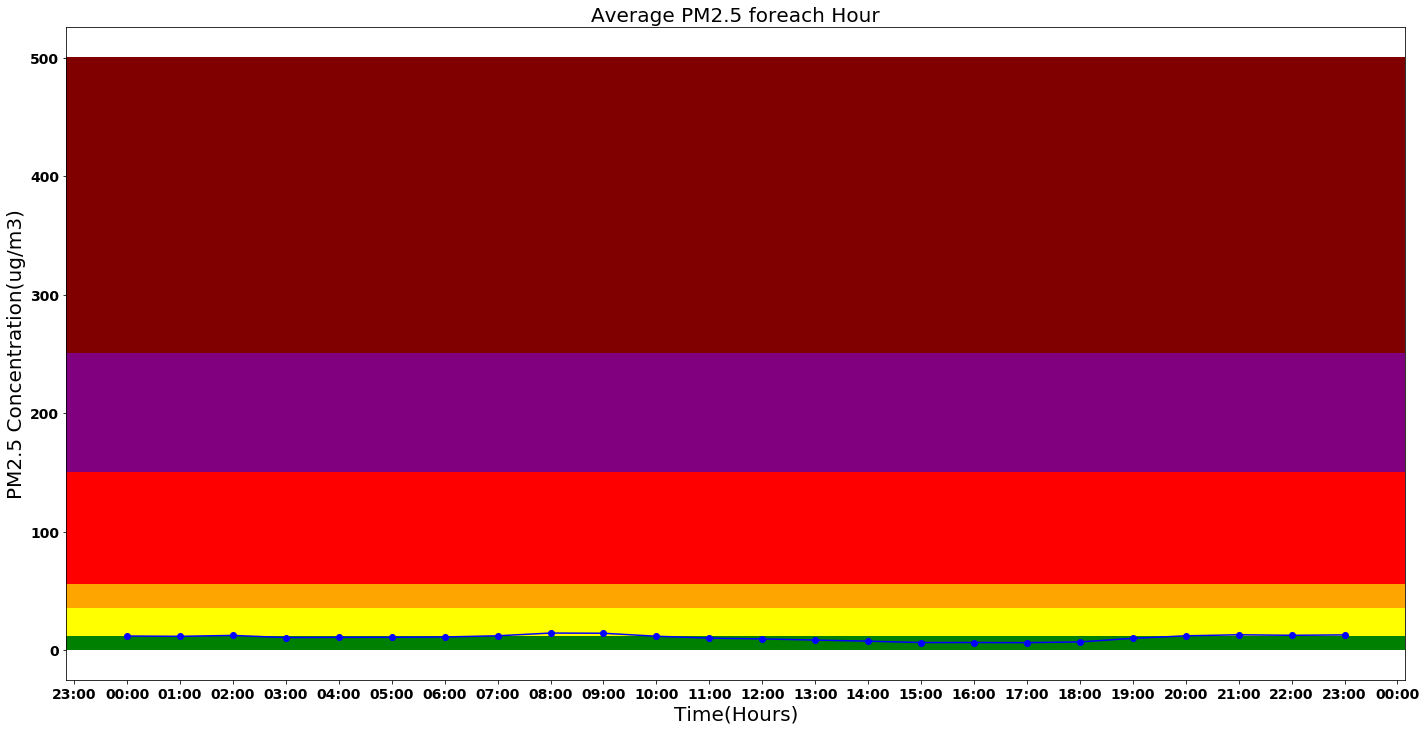

In [441]:
y_axis_values = average_pm25_concentration_for_each_hour_of_day['PM2.5(Ug/m3)'].values
x_axis_values = average_pm25_concentration_for_each_hour_of_day['TimeStamp'].values
x_axis_label = 'Time(Hours)'
y_axis_label =  'PM2.5 Concentration(ug/m3)'
chart_title  =  'Average PM2.5 foreach Hour'
file_path    =   os.path.join(filepath , 'average_pm25_foreach_hour')

make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)

In [442]:
average_pm25_trend_for_each_hour = go.Scatter(x=average_pm25_concentration_for_each_hour_of_day['TimeStamp'].values,
                         y = average_pm25_concentration_for_each_hour_of_day['PM2.5(Ug/m3)'].values) 

layout = go.Layout(title='Average PM2.5 foreach Hour', xaxis=dict(title='Hour'),
                   yaxis=dict(title='PM2.5 Concentration(ug/m3)'))

fig = go.Figure(data=[average_pm25_trend_for_each_hour], layout=layout)
iplot(fig)
pio.write_image(fig, os.path.join(filepath , 'average_pm25_concentration_trend_for_each_hour.png'))

### Save the resampled pm2.5 concentration

In [443]:
daily_average_airquality_data_concentrations.to_csv(os.path.join(filepath , 'daily_average_pm25_concentration.csv'))
monthly_average_airquality_data_concentrations.to_csv(os.path.join(filepath , 'monthly_average_pm25_concentration.csv'))
hourly_average_airquality_data_concentrations.to_csv(os.path.join(filepath , 'hourly_average_pm25_concentration.csv'))
average_pm25_concentration_for_each_hour_of_day.to_csv(os.path.join(filepath , 'average_pm25_concentration_for_each_hour_of_day.csv'))

daily_average_airquality_data_concentrations_analysis.to_csv(os.path.join(filepath , 'daily_average_pm25_concentration_analysis.csv'))
monthly_average_airquality_data_concentrations_analysis.to_csv(os.path.join(filepath , 'monthly_average_pm25_concentration_analysis.csv'))
hourly_average_airquality_data_concentrations_analysis.to_csv(os.path.join(filepath , 'hourly_average_pm25_concentration_analysis.csv'))

### Data analysis daily  airquality dataset

In [444]:
show_dataframe_info(daily_average_airquality_data_concentrations)

(604, 3)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2017-09-04 to 2019-04-30
Freq: D
Data columns (total 3 columns):
PM1(Ug/m3)      604 non-null float64
PM2.5(Ug/m3)    604 non-null float64
PM10(Ug/m3)     604 non-null float64
dtypes: float64(3)
memory usage: 18.9 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
dtype: object


### Show Histogram Distributions for the concentrations

<Figure size 1152x576 with 0 Axes>

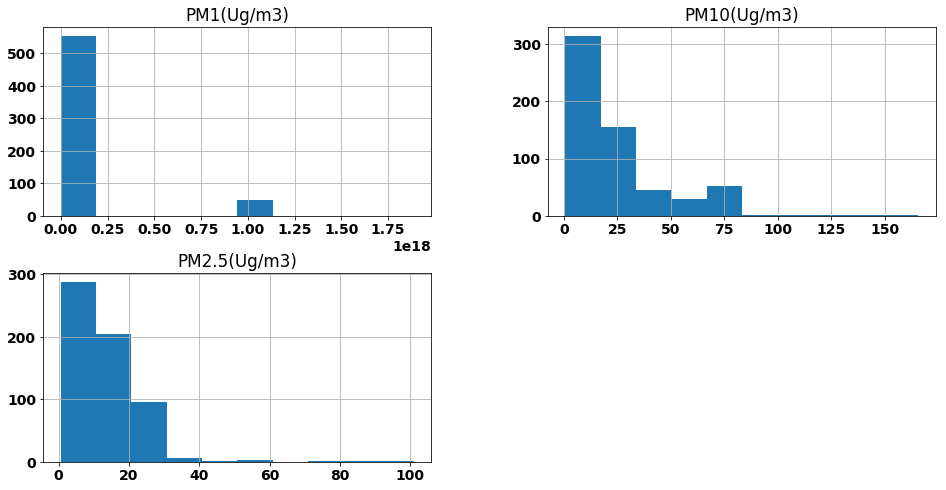

In [445]:
plt.figure(figsize=(16,8))
daily_average_airquality_data_concentrations.hist()
plt.savefig(os.path.join(filepath ,"daily_average_airquality_data_concentrations_historgram.png"))

In [446]:
daily_average_airquality_data_concentrations.head(100)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2017-09-04,6.790000e+00,8.080,11.250
2017-09-05,8.565000e+00,10.615,17.135
2017-09-06,8.565000e+00,10.615,17.135
2017-09-07,8.565000e+00,10.615,17.135
2017-09-08,8.565000e+00,10.615,17.135
2017-09-09,8.565000e+00,10.615,17.135
2017-09-10,8.565000e+00,10.615,17.135
2017-09-11,8.565000e+00,10.615,17.135
2017-09-12,8.565000e+00,10.615,17.135


In [447]:
daily_average_airquality_data_concentrations.tail(10)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
TimeStamp,,,
2019-04-21,3.57,3.84,3.84
2019-04-22,5.07,5.40,5.40
2019-04-23,3.67,4.07,4.57
2019-04-24,2.56,2.74,2.74
2019-04-25,5.84,6.26,6.27
2019-04-26,3.94,4.22,4.24
2019-04-27,3.33,3.63,3.63
2019-04-28,3.19,3.48,3.48
2019-04-29,2.77,2.94,2.95


In [448]:
#daily_airquality_data_concentrations.info()

### Plot the daily airquality data concentrations 

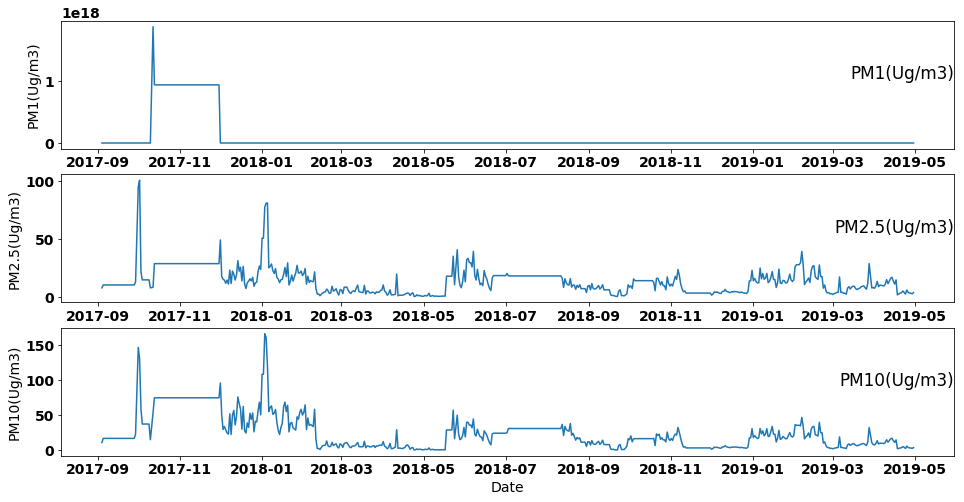

In [449]:
values = daily_average_airquality_data_concentrations.values
# specify columns to plot
groups = [0,1,2]
i = 1
# plot each column

plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(daily_average_airquality_data_concentrations.index,values[:, group])
    plt.title(daily_average_airquality_data_concentrations.columns[group], loc='right', y=0.5)
    plt.xlabel('Date')
    plt.ylabel(daily_average_airquality_data_concentrations.columns[group])
    i += 1
    
plt.savefig(os.path.join(filepath ,"daily_average_airquality_data_concentrations_linegraph.png"))
plt.show()

In [450]:
values.shape

(604, 3)

### Plotting the airquality timeseries

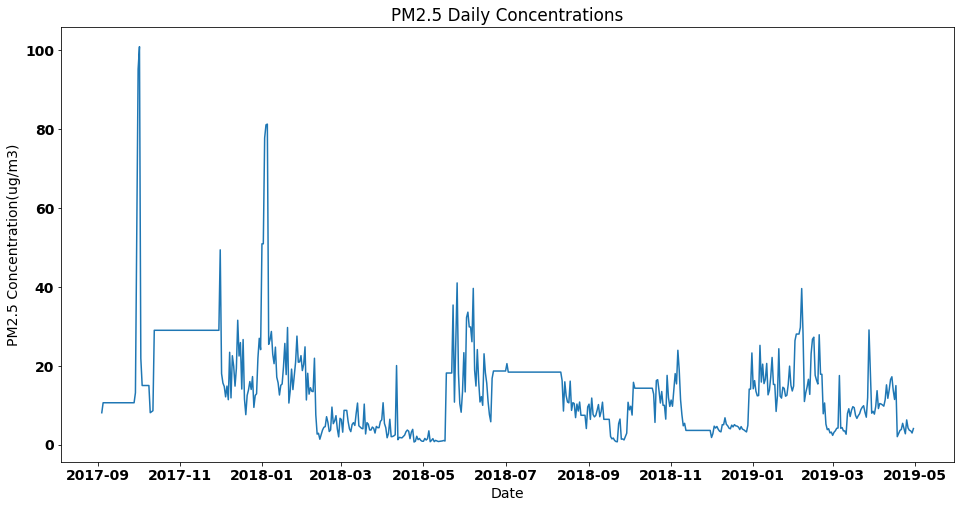

In [451]:
airquality_pm25_values = values[:, 1]
plt.figure(figsize=(16,8))
plt.plot(daily_average_airquality_data_concentrations.index, airquality_pm25_values)
plt.title('PM2.5 Daily Concentrations')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration(ug/m3)')
plt.savefig(os.path.join(filepath ,"daily_average_pm25_concentration_trend_linegraph.png"))
plt.show()

### Getting the date of the first and last record of the daily airquality dataset
This is essential to understand the date range for records from meteorology that shall be merged to this dataset

In [452]:
## get the lower boundary date from the daily airquality dataset
daily_average_airquality_data_concentrations.iloc[:1,:]
t= daily_average_airquality_data_concentrations.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
daily_average_airquality_data_lower_boundary_date = z.strftime('%Y-%m-%d')

print(daily_average_airquality_data_lower_boundary_date)
## get the upper boundary date from the daily airquality dataset
t = daily_average_airquality_data_concentrations.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
daily_average_airquality_data_upper_boundary_date = z.strftime('%Y-%m-%d')
print(daily_average_airquality_data_upper_boundary_date)



2017-09-04
2019-04-30


### Getting the datetime of the first and last record of the hourly airquality dataset

In [453]:
## get the lower boundary date from the hourly airquality dataset
hourly_average_airquality_data_concentrations.iloc[:1,:]
h= hourly_average_airquality_data_concentrations.iloc[:1,:].index.values[0]
h = h.astype(datetime.datetime)
y= pd.to_datetime(h)
hourly_average_airquality_data_lower_boundary_date = y.strftime('%Y-%m-%d %H:%M:%S')
  
print(hourly_average_airquality_data_lower_boundary_date)
## get the upper boundary date from the hourly airquality dataset
h = hourly_average_airquality_data_concentrations.iloc[-1:,:].index.values[0]
h = h.astype(datetime.datetime)
y= pd.to_datetime(h)
hourly_average_airquality_data_upper_boundary_date = y.strftime('%Y-%m-%d %H:%M:%S')
print(hourly_average_airquality_data_upper_boundary_date)

2017-09-04 09:00:00
2019-04-30 09:00:00


### Analysing the relationship among the airpollutant concentrations in relation to pm2.5
- use scatter plots to determine the extent of correlation and sense of correlation between pm2.5 and other air pollutant concentrations i.e pm1, pm10, co, so2.

- this can be acomplished used sns pairplot or matplot pair plot for each pair of variables.

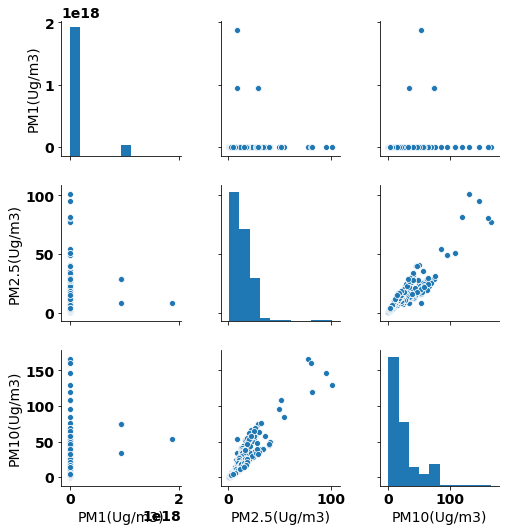

In [454]:
import seaborn as sns;
sns.pairplot(daily_average_airquality_data_concentrations)
plt.savefig(os.path.join(filepath ,"daily_average_airquality_data_concentrations_pairplot_corr.png"))
plt.show()

In [455]:
daily_average_airquality_data_concentrations.corr()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3)
PM1(Ug/m3),1.000000,0.369458,0.592370
PM2.5(Ug/m3),0.369458,1.000000,0.912061
PM10(Ug/m3),0.592370,0.912061,1.000000


### Read in the Meteorological data for preprocessing it
- read in dataset
- display first 10 records
- display last 10 records
- display dataset summary i.e shape, column names, info and datatypes for each column
- generate and display descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s  distribution

In [456]:
daily_meteorological_data = pd.read_csv('data/Met/tahmo_Makerere_Synopticdata_daily.csv')
monthly_meteorological_data = pd.read_csv('data/Met/tahmo_Makerere_Synopticdata_monthly.csv')
hourly_meteorological_data = pd.read_csv('data/Met/tahmo_Makerere_Synopticdata_hourly.csv')
daily_tahmo_unma_rainfall_comparison_data = pd.read_csv('data/Met/tahmo_unma_rainfall_comparison_daily.csv')
daily_meteorological_data.head(10)

,site,name,day,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),min temperature (oC),max temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
0,TA00216,Makerere Synoptic,2017-09-09,86.22,0.00,87.666,0.00,20.92,19.78,22.72,SE,0.59,0.29,1.19
1,TA00216,Makerere Synoptic,2017-09-10,78.17,0.00,87.715,3575.39,21.91,18.57,26.37,NE,0.60,0.31,1.41
2,TA00216,Makerere Synoptic,2017-09-11,75.27,1.77,87.657,4600.25,23.05,17.99,28.23,NE,0.69,0.44,1.27
3,TA00216,Makerere Synoptic,2017-09-13,90.00,0.00,87.730,0.00,20.46,20.46,20.46,E,0.91,0.91,0.91
4,TA00216,Makerere Synoptic,2017-09-24,78.17,0.00,87.780,4839.53,22.02,18.40,27.86,SE,0.88,0.30,1.63
5,TA00216,Makerere Synoptic,2017-09-25,80.21,7.88,87.627,4820.36,21.65,17.37,28.59,E,0.70,0.39,1.03
6,TA00216,Makerere Synoptic,2017-09-26,90.25,0.00,87.645,0.00,19.60,18.55,20.83,N,0.62,0.19,1.23
7,TA00216,Makerere Synoptic,2017-10-31,84.50,1.07,87.665,0.00,20.55,18.64,21.39,NE,0.95,0.71,1.24
8,TA00216,Makerere Synoptic,2017-11-01,73.00,1.67,87.624,4707.15,23.25,18.10,28.83,SE,0.69,0.32,1.38
9,TA00216,Makerere Synoptic,2017-11-02,74.96,0.02,87.610,4683.44,22.99,19.15,28.99,W,0.66,0.22,1.28


### comparison of UNMA and tahmo daily rainfall dataset

In [457]:
show_dataframe_info(daily_tahmo_unma_rainfall_comparison_data)
daily_tahmo_unma_rainfall_comparison_data_without_missing_records =  daily_tahmo_unma_rainfall_comparison_data.dropna()
daily_tahmo_unma_rainfall_comparison_data_without_missing_records["Date"] = pd.to_datetime(daily_tahmo_unma_rainfall_comparison_data_without_missing_records["Date"])
daily_tahmo_unma_rainfall_comparison_data_without_missing_values = daily_tahmo_unma_rainfall_comparison_data_without_missing_records.set_index('Date')
print(daily_tahmo_unma_rainfall_comparison_data.head(3))
show_dataframe_info(daily_tahmo_unma_rainfall_comparison_data_without_missing_values)

(365, 3)
['Date', 'Tahmo', 'UNMA']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Date     365 non-null object
Tahmo    365 non-null float64
UNMA     335 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 Date      object
Tahmo    float64
UNMA     float64
dtype: object
         Date  Tahmo  UNMA
0  2018-01-01   0.00   0.0
1  2018-01-02   0.06   0.0
2  2018-01-03   0.06   0.0
(335, 2)
['Tahmo', 'UNMA']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2018-01-01 to 2018-12-31
Data columns (total 2 columns):
Tahmo    335 non-null float64
UNMA     335 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB

 dataframe info: 
 None

 dataframe column datatypes:
 Tahmo    float64
UNMA     float64
dtype: object


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [458]:
daily_tahmo_unma_rainfall_comparison_data_without_missing_values.head()

,Tahmo,UNMA
Date,,
2018-01-01,0.00,0.0
2018-01-02,0.06,0.0
2018-01-03,0.06,0.0
2018-01-04,0.02,0.0
2018-01-05,0.08,0.0


In [459]:
show_dataframe_info(daily_tahmo_unma_rainfall_comparison_data)

(365, 3)
['Date', 'Tahmo', 'UNMA']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Date     365 non-null object
Tahmo    365 non-null float64
UNMA     335 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 Date      object
Tahmo    float64
UNMA     float64
dtype: object


### Correlation between rainfall observations from unma and tahmo

In [460]:
daily_tahmo_unma_rainfall_comparison_data_correlations= daily_tahmo_unma_rainfall_comparison_data_without_missing_values.corr()
daily_tahmo_unma_rainfall_comparison_data_correlations.to_csv(os.path.join(filepath, 'daily_tahmo_unma_rainfall_comparison_data_correlations.csv'))
daily_tahmo_unma_rainfall_comparison_data_correlations

,Tahmo,UNMA
Tahmo,1.000000,0.598427
UNMA,0.598427,1.000000


### Line graphs showing comparison of rainfall dataset from unma and tahmo

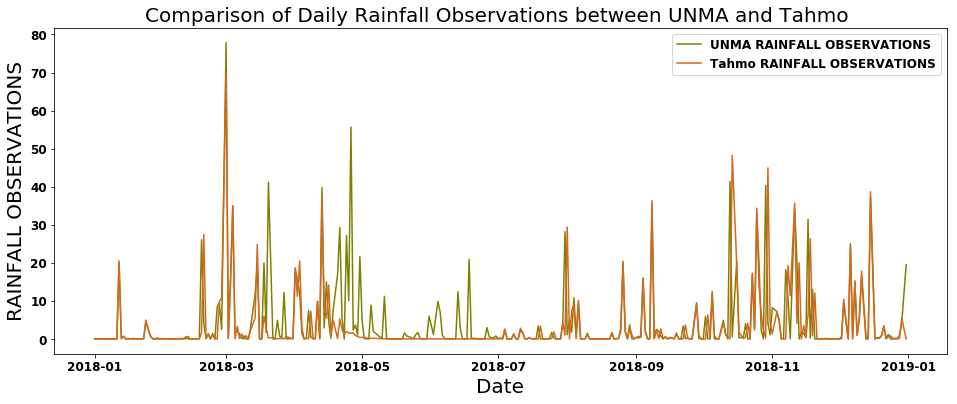

In [461]:
    fig = plt.figure(figsize=(16,6))
    plt.rcParams.update({'font.size':12, 'font.weight':'bold'})
    plt.plot(daily_tahmo_unma_rainfall_comparison_data_without_missing_values.index, 
             daily_tahmo_unma_rainfall_comparison_data_without_missing_values['UNMA'], 
             color='olive',  linestyle='solid', label='UNMA RAINFALL OBSERVATIONS')
    plt.plot(daily_tahmo_unma_rainfall_comparison_data_without_missing_values.index, 
             daily_tahmo_unma_rainfall_comparison_data_without_missing_values['Tahmo'], 
             color='chocolate', linestyle='solid', label='Tahmo RAINFALL OBSERVATIONS')
   
    #marker='o', marker='x',
    chart_title =  'Comparison of Daily Rainfall Observations between UNMA and Tahmo '
    plt.title(chart_title,fontsize=20)
    plt.ylabel('RAINFALL OBSERVATIONS', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    #plt.margins(0.1)
    plt.legend()
    plt.show()
    path_to_save_file = os.path.join('data','Met')
    fig.savefig(os.path.join( path_to_save_file , 'daily_tahmo_unma_rainfall_comparison_data.png'))

In [462]:
daily_meteorological_data.tail()

,site,name,day,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),min temperature (oC),max temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
593,TA00216,Makerere Synoptic,2019-06-09,93.25,3.05,87.995,2095.98,20.35,18.81,22.08,E,0.60,0.17,1.24
594,TA00216,Makerere Synoptic,2019-06-10,90.79,3.46,87.899,2638.94,20.31,18.18,23.09,SE,0.46,0.13,1.04
595,TA00216,Makerere Synoptic,2019-06-11,91.08,2.62,87.943,2438.25,20.33,18.74,24.11,E,0.45,0.13,1.30
596,TA00216,Makerere Synoptic,2019-06-12,85.38,0.68,87.939,4209.44,21.48,18.47,24.75,S,0.56,0.19,1.14
597,TA00216,Makerere Synoptic,2019-06-13,94.42,40.87,87.959,2911.88,20.48,18.38,24.14,NW,0.45,0.15,1.01


In [463]:
show_dataframe_info(daily_meteorological_data)

(598, 14)
['site', 'name', 'day', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'min temperature (oC)', 'max temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 14 columns):
site                         598 non-null object
name                         598 non-null object
day                          598 non-null object
average humidity (%)         598 non-null float64
total rainfall (mm)          598 non-null float64
average pressure (kPa)       598 non-null float64
total radiation (W/m2)       598 non-null float64
average temperature (oC)     598 non-null float64
min temperature (oC)         598 non-null float64
max temperature (oC)         598 non-null float64
predominant winddirection    598 non-null object
average windspeed (m/s)      598 non-n

In [464]:
daily_meteorological_data.describe()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),min temperature (oC),max temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,77.957742,3.514799,87.685090,3812.510151,22.548880,18.738077,27.798278,0.910635,0.293629,2.367040
std,12.450630,8.703987,0.137135,1200.251535,1.436224,1.096167,2.214626,0.696541,0.137036,4.194134
min,0.000000,0.000000,87.313000,0.000000,17.910000,15.470000,19.680000,0.420000,0.000000,0.680000
25%,74.510000,0.000000,87.589000,2986.087500,21.560000,18.012500,26.550000,0.632500,0.220000,1.170000
50%,79.540000,0.100000,87.675000,3892.755000,22.540000,18.700000,27.790000,0.730000,0.280000,1.355000
75%,84.617500,1.987500,87.775000,4723.055000,23.580000,19.417500,29.200000,0.897500,0.360000,1.830000
max,98.290000,69.870000,88.015000,7245.040000,26.380000,21.610000,33.370000,12.400000,1.240000,36.910000


### Drop columns from daily,hourly and monthly meteorological dataset (tahmo) that shall not be used during analysis

### daily
- site 
- name
- max temperature
- min temperature

### hourly
- site 
- name

### monthly
- site 
- name
- min windspeed(m/s)
- max windspeed(m/s)

In [465]:
daily_meteorological_data_of_interest = daily_meteorological_data.drop(
    ['site','name','min temperature (oC)','max temperature (oC)'], axis=1)

hourly_meteorological_data_of_interest = hourly_meteorological_data.drop(['site','name'], axis=1)

monthly_meteorological_data_of_interest = monthly_meteorological_data.drop(
    ['site','name','min temperature (oC)','max temperature (oC)','max windspeed (m/s)','min windspeed (m/s)'], axis=1)

In [466]:
daily_meteorological_data_of_interest.head()

,day,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
0,2017-09-09,86.22,0.00,87.666,0.00,20.92,SE,0.59,0.29,1.19
1,2017-09-10,78.17,0.00,87.715,3575.39,21.91,NE,0.60,0.31,1.41
2,2017-09-11,75.27,1.77,87.657,4600.25,23.05,NE,0.69,0.44,1.27
3,2017-09-13,90.00,0.00,87.730,0.00,20.46,E,0.91,0.91,0.91
4,2017-09-24,78.17,0.00,87.780,4839.53,22.02,SE,0.88,0.30,1.63


In [467]:
show_dataframe_info(daily_meteorological_data_of_interest)

(598, 10)
['day', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 10 columns):
day                          598 non-null object
average humidity (%)         598 non-null float64
total rainfall (mm)          598 non-null float64
average pressure (kPa)       598 non-null float64
total radiation (W/m2)       598 non-null float64
average temperature (oC)     598 non-null float64
predominant winddirection    598 non-null object
average windspeed (m/s)      598 non-null float64
min windspeed (m/s)          598 non-null float64
max windspeed (m/s)          598 non-null float64
dtypes: float64(8), object(2)
memory usage: 46.8+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 day                           object
aver

In [468]:
hourly_meteorological_data.head()

,site,name,dateTimeUTC,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),winddirection,windspeed (m/s)
0,TA00216,Makerere Synoptic,2017-09-09 15:00:00,73,0.0,87.50,0.9,23.27,SE,0.44
1,TA00216,Makerere Synoptic,2017-09-09 16:00:00,77,0.0,87.58,0.0,22.72,NE,0.38
2,TA00216,Makerere Synoptic,2017-09-09 17:00:00,80,0.0,87.67,0.0,22.29,SE,0.37
3,TA00216,Makerere Synoptic,2017-09-09 18:00:00,82,0.0,87.66,0.0,21.71,N,0.34
4,TA00216,Makerere Synoptic,2017-09-09 19:00:00,87,0.0,87.68,0.0,20.86,NE,0.29


In [469]:
show_dataframe_info(hourly_meteorological_data)

(14288, 10)
['site', 'name', 'dateTimeUTC', 'humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'winddirection', 'windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14288 entries, 0 to 14287
Data columns (total 10 columns):
site                  14288 non-null object
name                  14288 non-null object
dateTimeUTC           14288 non-null object
humidity (%)          14288 non-null int64
precipitation (mm)    14288 non-null float64
pressure (kPa)        14288 non-null float64
radiation (W/m2)      14288 non-null float64
temperature (oC)      14288 non-null float64
winddirection         14288 non-null object
windspeed (m/s)       14288 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.1+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 site                   object
name                   object
dateTimeUTC            object
humidity (%)            int64
precipitation (mm)    float64
pre

In [470]:
monthly_meteorological_data_of_interest.head()

,month,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s)
0,2017-09,79.55,9.65,87.693,17835.53,21.85,E,0.70
1,2017-10,84.50,1.07,87.665,0.00,20.55,NE,0.95
2,2017-11,79.95,216.68,87.636,118238.95,22.05,E,0.69
3,2017-12,73.99,27.74,87.592,124474.15,23.17,S,0.79
4,2018-01,69.63,28.44,87.582,115217.19,22.86,SE,0.90


In [471]:
show_dataframe_info(monthly_meteorological_data)

(21, 14)
['site', 'name', 'month', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'min temperature (oC)', 'max temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
site                         21 non-null object
name                         21 non-null object
month                        21 non-null object
average humidity (%)         21 non-null float64
total rainfall (mm)          21 non-null float64
average pressure (kPa)       21 non-null float64
total radiation (W/m2)       21 non-null float64
average temperature (oC)     21 non-null float64
min temperature (oC)         21 non-null float64
max temperature (oC)         21 non-null float64
predominant winddirection    21 non-null object
average windspeed (m/s)      21 non-null float64
m

###  Set the day column to be the index for the daily meteorological dataset
- parse the  day column into datetime.
- set the  day column to be the index for the dataframe.

### set the dateTimeUTC to be the index of the hourly meteorological dataset
- parse the  dateTimeUTC column into datetime.
- set the  dateTimeUTC column to be the index for the dataframe.
- change the hourly data from UTC to EAT(Nairobi) ugandanda time.

In [472]:
daily_meteorological_data_of_interest["day"] = pd.to_datetime(daily_meteorological_data_of_interest["day"])
daily_meteorological_data_values  = daily_meteorological_data_of_interest.set_index('day')


monthly_meteorological_data_of_interest["month"] = pd.to_datetime(monthly_meteorological_data_of_interest["month"])
monthly_meteorological_data_values = monthly_meteorological_data_of_interest.set_index('month')

hourly_meteorological_data_of_interest["dateTimeUTC"] = pd.to_datetime(hourly_meteorological_data_of_interest["dateTimeUTC"])
hourly_meteorological_data_of_interest["dateTime"] = hourly_meteorological_data_of_interest["dateTimeUTC"] + datetime.timedelta(hours=3)
hourly_meteorological_data_values = hourly_meteorological_data_of_interest.set_index('dateTime')
hourly_meteorological_data_values = hourly_meteorological_data_values.drop(['dateTimeUTC'], axis=1)


### Data Analysis on Monthly Meteorological data

In [473]:
monthly_meteorological_data_values.head()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s)
month,,,,,,,
2017-09-01,79.55,9.65,87.693,17835.53,21.85,E,0.70
2017-10-01,84.50,1.07,87.665,0.00,20.55,NE,0.95
2017-11-01,79.95,216.68,87.636,118238.95,22.05,E,0.69
2017-12-01,73.99,27.74,87.592,124474.15,23.17,S,0.79
2018-01-01,69.63,28.44,87.582,115217.19,22.86,SE,0.90


In [474]:
show_dataframe_info(monthly_meteorological_data_values)

(21, 7)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2017-09-01 to 2019-05-01
Data columns (total 7 columns):
average humidity (%)         21 non-null float64
total rainfall (mm)          21 non-null float64
average pressure (kPa)       21 non-null float64
total radiation (W/m2)       21 non-null float64
average temperature (oC)     21 non-null float64
predominant winddirection    21 non-null object
average windspeed (m/s)      21 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.3+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 average humidity (%)         float64
total rainfall (mm)          float64
average pressure (kPa)       float64
total radiation (W/m2)       float64
average temperature (oC)     float64
predominant winddirection     object
average windsp

### Show histogram distributions for the monthly meteorological data

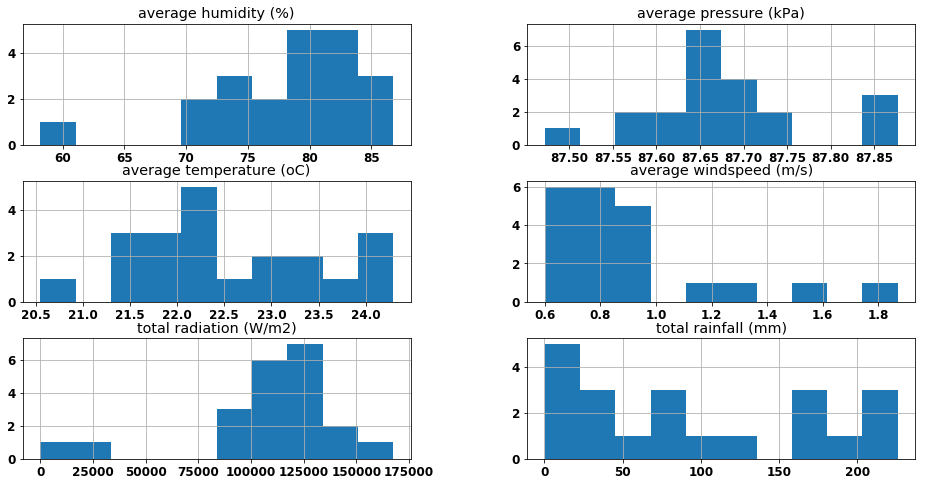

In [475]:
monthly_meteorological_data_values.hist()
plt.savefig(os.path.join(filepath ,"monthly_meteorological_data_historgram.png"))
plt.show()

### Data analysis on daily meteorological dataset

In [476]:
show_dataframe_info(daily_meteorological_data_values)

(598, 9)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'predominant winddirection', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2017-09-09 to 2019-06-13
Data columns (total 9 columns):
average humidity (%)         598 non-null float64
total rainfall (mm)          598 non-null float64
average pressure (kPa)       598 non-null float64
total radiation (W/m2)       598 non-null float64
average temperature (oC)     598 non-null float64
predominant winddirection    598 non-null object
average windspeed (m/s)      598 non-null float64
min windspeed (m/s)          598 non-null float64
max windspeed (m/s)          598 non-null float64
dtypes: float64(8), object(1)
memory usage: 46.7+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 average humidity (%)         float64
total rainfall (mm)          float64
averag

### Show histogram distributions for the daily meteorology data

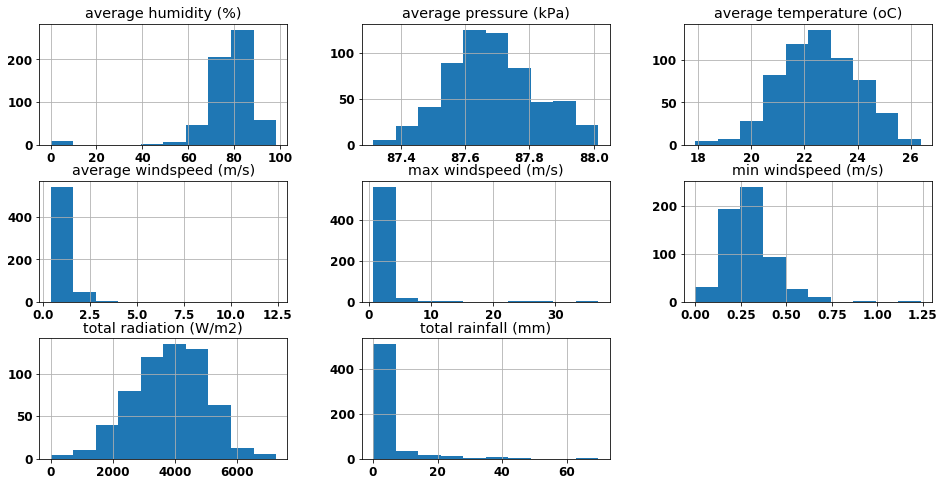

In [477]:
daily_meteorological_data_values.hist()
plt.savefig(os.path.join(filepath ,"daily_meteorological_data_historgram.png"))
plt.show()

In [478]:
daily_meteorological_data_values.head(10)

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s),min windspeed (m/s),max windspeed (m/s)
day,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,SE,0.59,0.29,1.19
2017-09-10,78.17,0.00,87.715,3575.39,21.91,NE,0.60,0.31,1.41
2017-09-11,75.27,1.77,87.657,4600.25,23.05,NE,0.69,0.44,1.27
2017-09-13,90.00,0.00,87.730,0.00,20.46,E,0.91,0.91,0.91
2017-09-24,78.17,0.00,87.780,4839.53,22.02,SE,0.88,0.30,1.63
2017-09-25,80.21,7.88,87.627,4820.36,21.65,E,0.70,0.39,1.03
2017-09-26,90.25,0.00,87.645,0.00,19.60,N,0.62,0.19,1.23
2017-10-31,84.50,1.07,87.665,0.00,20.55,NE,0.95,0.71,1.24
2017-11-01,73.00,1.67,87.624,4707.15,23.25,SE,0.69,0.32,1.38


### Show histogram distributions for the hourly meteorological data

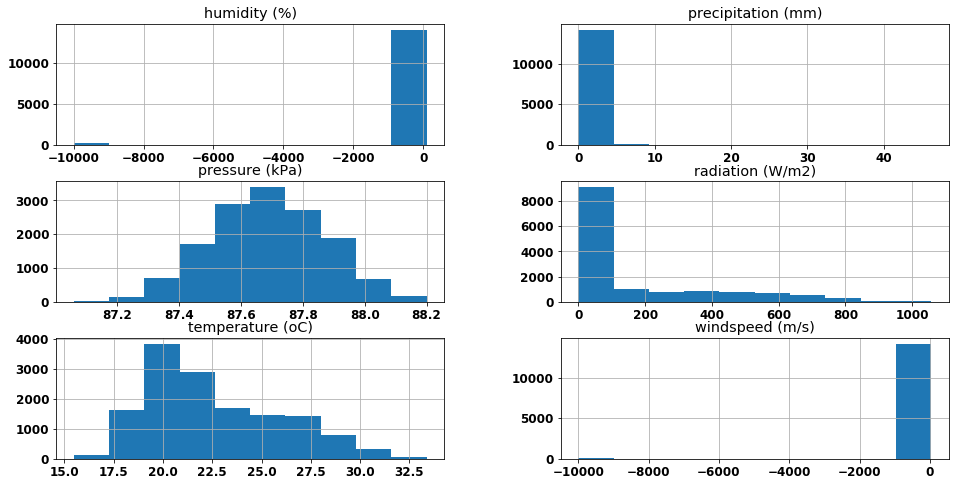

In [479]:
hourly_meteorological_data_values.hist()
plt.savefig(os.path.join(filepath ,"hourly_meteorological_data_historgram.png"))
plt.show()

### One Hot Encoding Categorical features (WindDirection)

In [480]:
daily_meteorological_data_values_onehot =  daily_meteorological_data_values.copy()
daily_meteorological_data_values_onehot = pd.get_dummies( daily_meteorological_data_values_onehot, columns=['predominant winddirection'], prefix = ['winddirection'])

daily_meteorological_data_values_onehot.head()
show_dataframe_info(daily_meteorological_data_values_onehot)

(598, 16)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2017-09-09 to 2019-06-13
Data columns (total 16 columns):
average humidity (%)        598 non-null float64
total rainfall (mm)         598 non-null float64
average pressure (kPa)      598 non-null float64
total radiation (W/m2)      598 non-null float64
average temperature (oC)    598 non-null float64
average windspeed (m/s)     598 non-null float64
min windspeed (m/s)         598 non-null float64
max windspeed (m/s)         598 non-null float64
winddirection_E             598 non-null uint8
winddirection_N             598 non-null uint8
winddirection_NE       

In [481]:
hourly_meteorological_data_values_onehot =  hourly_meteorological_data_values.copy()
hourly_meteorological_data_values_onehot = pd.get_dummies( hourly_meteorological_data_values_onehot, columns=['winddirection'], prefix = ['winddirection'])

hourly_meteorological_data_values_onehot.head()
show_dataframe_info(hourly_meteorological_data_values_onehot)

(14288, 14)
['humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14288 entries, 2017-09-09 18:00:00 to 2019-06-15 02:00:00
Data columns (total 14 columns):
humidity (%)          14288 non-null int64
precipitation (mm)    14288 non-null float64
pressure (kPa)        14288 non-null float64
radiation (W/m2)      14288 non-null float64
temperature (oC)      14288 non-null float64
windspeed (m/s)       14288 non-null float64
winddirection_E       14288 non-null uint8
winddirection_N       14288 non-null uint8
winddirection_NE      14288 non-null uint8
winddirection_NW      14288 non-null uint8
winddirection_S       14288 non-null uint8
winddirection_SE      14288 non-null uint8
winddirection_SW      14288 non-null uint8
win

### Obtaining Meteorology data in the same date range as airquality data

In [482]:
daily_meteorological_data_in_same_daterange_with_daily_airquality_data= daily_meteorological_data_values_onehot[daily_average_airquality_data_lower_boundary_date : daily_average_airquality_data_upper_boundary_date]
hourly_meteorological_data_in_same_daterange_with_daily_airquality_data= hourly_meteorological_data_values_onehot[hourly_average_airquality_data_lower_boundary_date : hourly_average_airquality_data_upper_boundary_date]

In [483]:
daily_meteorological_data_in_same_daterange_with_daily_airquality_data.head()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
day,,,,,,,,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,0.59,0.29,1.19,0,0,0,0,0,1,0,0
2017-09-10,78.17,0.00,87.715,3575.39,21.91,0.60,0.31,1.41,0,0,1,0,0,0,0,0
2017-09-11,75.27,1.77,87.657,4600.25,23.05,0.69,0.44,1.27,0,0,1,0,0,0,0,0
2017-09-13,90.00,0.00,87.730,0.00,20.46,0.91,0.91,0.91,1,0,0,0,0,0,0,0
2017-09-24,78.17,0.00,87.780,4839.53,22.02,0.88,0.30,1.63,0,0,0,0,0,1,0,0


In [484]:
show_dataframe_info(daily_meteorological_data_in_same_daterange_with_daily_airquality_data)

(554, 16)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 554 entries, 2017-09-09 to 2019-04-30
Data columns (total 16 columns):
average humidity (%)        554 non-null float64
total rainfall (mm)         554 non-null float64
average pressure (kPa)      554 non-null float64
total radiation (W/m2)      554 non-null float64
average temperature (oC)    554 non-null float64
average windspeed (m/s)     554 non-null float64
min windspeed (m/s)         554 non-null float64
max windspeed (m/s)         554 non-null float64
winddirection_E             554 non-null uint8
winddirection_N             554 non-null uint8
winddirection_NE       

#### Handle missing data in daily meteorology data by filling NaN with the Mean of each column

In [485]:
daily_meteorological_data_with_out_missing_values =daily_meteorological_data_in_same_daterange_with_daily_airquality_data
#daily_meteorological_data_with_out_missing_values.fillna(daily_meteorological_data_with_out_missing_values.mean(),inplace=True)
show_dataframe_info(daily_meteorological_data_with_out_missing_values)

(554, 16)
['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 554 entries, 2017-09-09 to 2019-04-30
Data columns (total 16 columns):
average humidity (%)        554 non-null float64
total rainfall (mm)         554 non-null float64
average pressure (kPa)      554 non-null float64
total radiation (W/m2)      554 non-null float64
average temperature (oC)    554 non-null float64
average windspeed (m/s)     554 non-null float64
min windspeed (m/s)         554 non-null float64
max windspeed (m/s)         554 non-null float64
winddirection_E             554 non-null uint8
winddirection_N             554 non-null uint8
winddirection_NE       

### Plot the daily meteorology data values for the time series

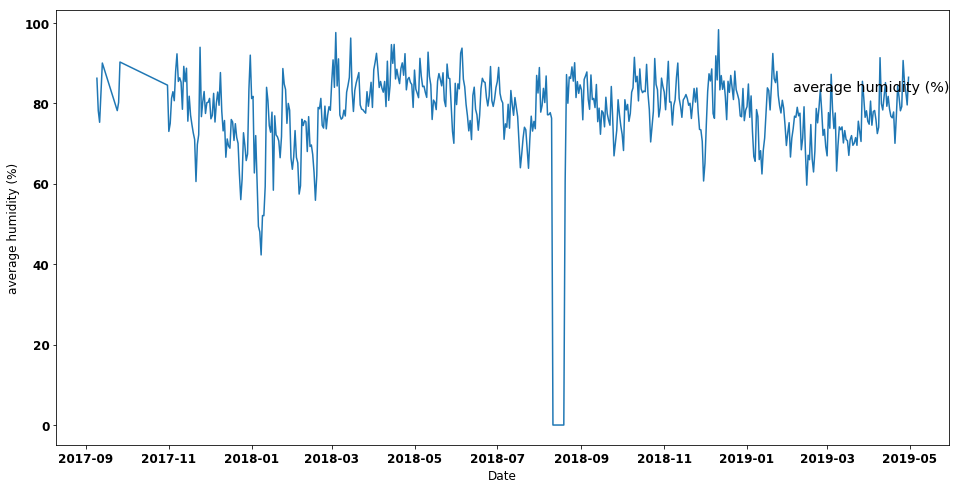

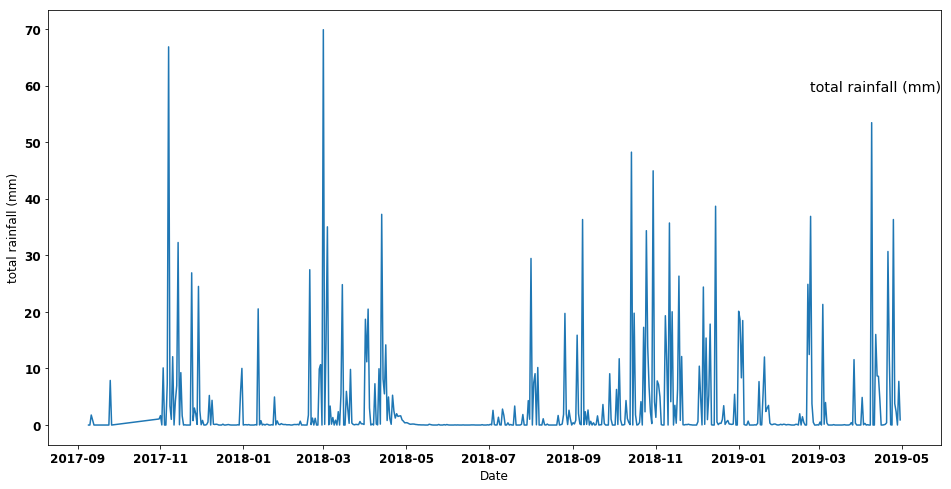

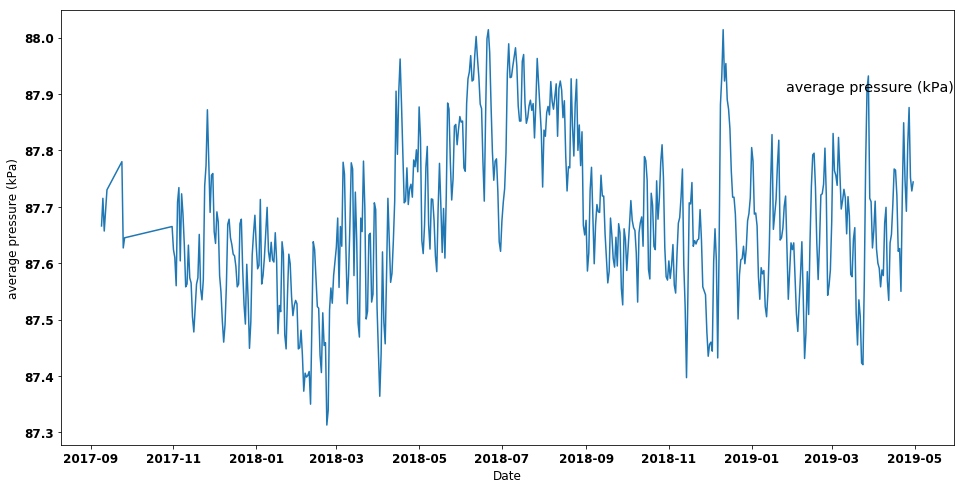

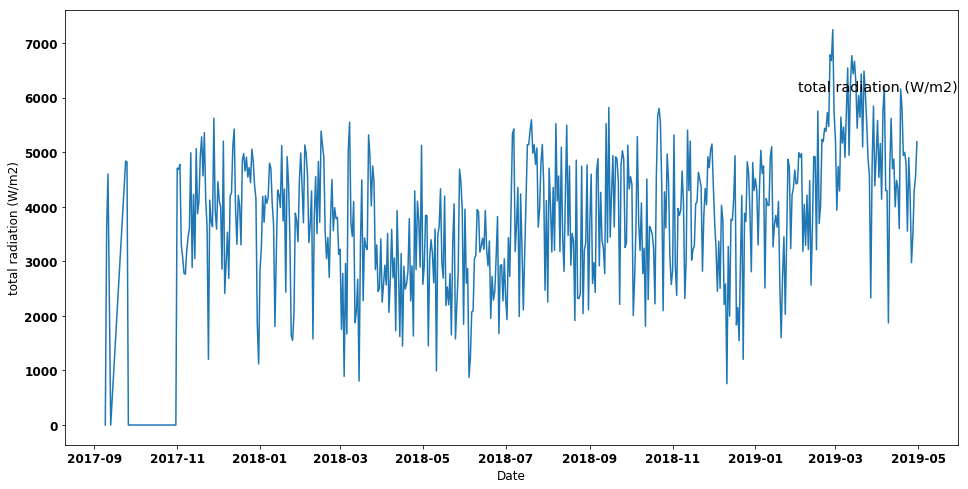

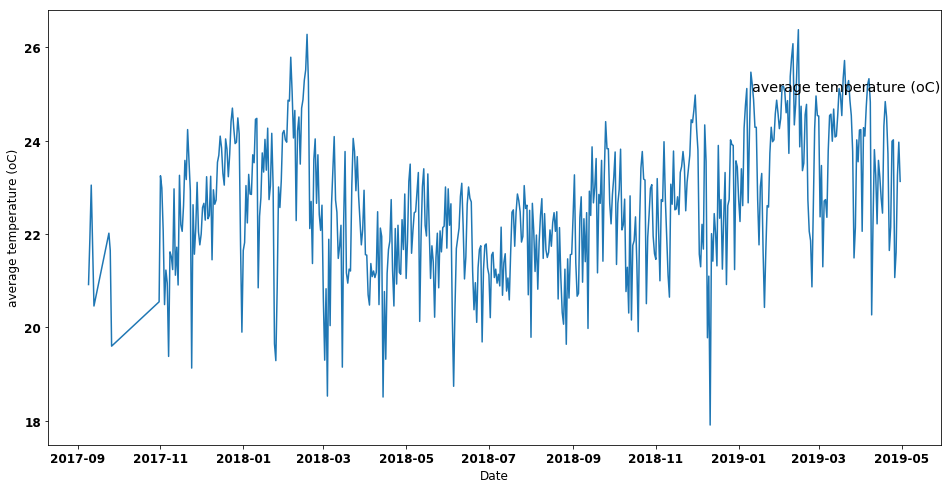

In [486]:
meteorological_values = daily_meteorological_data_with_out_missing_values.values
# specify columns to plot
groups = [0,1,2, 3, 4]
i = 1
# plot each column

plt.figure()
for group in groups:
    #plt.subplot(len(groups), 1, i)
    plt.plot(daily_meteorological_data_with_out_missing_values.index,meteorological_values[:, group])
    plt.title(daily_meteorological_data_with_out_missing_values.columns[group], loc='right', y=0.8)
    plt.xlabel('Date')
    plt.ylabel(daily_meteorological_data_with_out_missing_values.columns[group])
    #i += 1
    plt.show()

### Vegetation Index (greenness Dataset)

In [487]:
show_dataframe_info(vi_data)

(27, 28)
['Latitude', 'Longitude', 'Date', 'MODIS_Tile', 'MOD13A3_006_Line_Y_1km', 'MOD13A3_006_Sample_X_1km', 'MOD13A3_006__1_km_monthly_EVI', 'MOD13A3_006__1_km_monthly_NDVI', 'MOD13A3_006__1_km_monthly_VI_Quality', 'MOD13A3_006__1_km_monthly_VI_Quality_bitmask', 'MOD13A3_006__1_km_monthly_VI_Quality_MODLAND', 'MOD13A3_006__1_km_monthly_VI_Quality_MODLAND_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_VI_Usefulness', 'MOD13A3_006__1_km_monthly_VI_Quality_VI_Usefulness_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Aerosol_Quantity', 'MOD13A3_006__1_km_monthly_VI_Quality_Aerosol_Quantity_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Adjacent_cloud_detected', 'MOD13A3_006__1_km_monthly_VI_Quality_Adjacent_cloud_detected_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Atmosphere_BRDF_Correction', 'MOD13A3_006__1_km_monthly_VI_Quality_Atmosphere_BRDF_Correction_Description', 'MOD13A3_006__1_km_monthly_VI_Quality_Mixed_Clouds', 'MOD13A3_006__1_km_monthly_VI_Quality_Mix

In [488]:
vi_mask = vi_data.dtypes == np.float64
vi_columns = vi_data.columns[vi_mask]
vi_data_of_interest = vi_data[vi_columns]
vi_data_of_interest['TimeStamp'] = vi_data['Date']
vi_data_of_interest = vi_data_of_interest.drop(
    ['Latitude','Longitude','MOD13A3_006_Sample_X_1km','MOD13A3_006_Line_Y_1km','MOD13A3_006__1_km_monthly_VI_Quality'], axis=1)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [489]:
vi_data_of_interest.head()

,MOD13A3_006__1_km_monthly_EVI,MOD13A3_006__1_km_monthly_NDVI,TimeStamp
0,0.2014,0.3528,2017-01-01
1,0.2184,0.3763,2017-02-01
2,0.1897,0.3239,2017-03-01
3,0.2144,0.3802,2017-04-01
4,0.2223,0.3976,2017-05-01


In [490]:
 vi_data_of_interest.rename(columns={'MOD13A3_006__1_km_monthly_EVI':'EVI','MOD13A3_006__1_km_monthly_NDVI':'NDVI'},inplace=True)

In [491]:
monthly_vi_data = vi_data_of_interest.set_index('TimeStamp')
monthly_vi_data_copy = monthly_vi_data.copy()
monthly_vi_data

,EVI,NDVI
TimeStamp,,
2017-01-01,0.2014,0.3528
2017-02-01,0.2184,0.3763
2017-03-01,0.1897,0.3239
2017-04-01,0.2144,0.3802
2017-05-01,0.2223,0.3976
2017-06-01,0.2165,0.4110
2017-07-01,0.2157,0.3879
2017-08-01,0.2327,0.4006
2017-09-01,0.2133,0.3988


### Analysing Relationship between PM2.5 and Greenness ( merging vi dataset and airquality dataset)

In [492]:
monthly_average_airquality_data_concentrations.head()
dates = monthly_average_airquality_data_concentrations.index
monthly_average_airquality_data_concentrations['MonthOfYear'] = pd.to_datetime(dates).strftime('%m-%Y') 
monthly_average_airquality_data_concentrations.head()

vi_dates = monthly_vi_data.index
monthly_vi_data['MonthOfYear'] = pd.to_datetime(vi_dates).strftime('%m-%Y') 

#print(monthly_average_airquality_data_concentrations.head())
#print(monthly_vi_data.head())

meteorological_monthly_dates = monthly_meteorological_data_values.index
monthly_meteorological_data_values['MonthOfYear'] = pd.to_datetime(meteorological_monthly_dates).strftime('%m-%Y') 
monthly_meteorological_data_values.head()


,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s),MonthOfYear
month,,,,,,,,
2017-09-01,79.55,9.65,87.693,17835.53,21.85,E,0.70,09-2017
2017-10-01,84.50,1.07,87.665,0.00,20.55,NE,0.95,10-2017
2017-11-01,79.95,216.68,87.636,118238.95,22.05,E,0.69,11-2017
2017-12-01,73.99,27.74,87.592,124474.15,23.17,S,0.79,12-2017
2018-01-01,69.63,28.44,87.582,115217.19,22.86,SE,0.90,01-2018


In [493]:
## get the lower boundary date from the monthly airquality dataset
monthly_average_airquality_data_concentrations.iloc[:1,:]
first_record= monthly_average_airquality_data_concentrations.iloc[:1,:].index.values[0]
first_record = first_record.astype(datetime.datetime)
x= pd.to_datetime(first_record)
monthly_average_airquality_data_lower_boundary_date = x.strftime('%m-%Y')
 
print(monthly_average_airquality_data_lower_boundary_date)
## get the upper boundary date from the monthly airquality dataset
last_record = monthly_average_airquality_data_concentrations.iloc[-1:,:].index.values[0]
last_record = last_record.astype(datetime.datetime)
y = pd.to_datetime(last_record)
monthly_average_airquality_data_upper_boundary_date = y.strftime('%m-%Y')
print(monthly_average_airquality_data_upper_boundary_date)


monthly_combined_airquality_vi_dataset= pd.merge(monthly_average_airquality_data_concentrations, monthly_vi_data, on='MonthOfYear')
merged_monthly_airquality_greenness_meteorological_dataset = pd.merge(monthly_combined_airquality_vi_dataset, monthly_meteorological_data_values, on='MonthOfYear')
merged_monthly_airquality_vi_dataset = monthly_combined_airquality_vi_dataset.set_index('MonthOfYear')
merged_monthly_airquality_greenness_meteorological_dataset = merged_monthly_airquality_greenness_meteorological_dataset.set_index('MonthOfYear')

print(merged_monthly_airquality_vi_dataset.head())
merged_monthly_airquality_greenness_meteorological_dataset.head()

09-2017
04-2019
               PM1(Ug/m3)  PM2.5(Ug/m3)  PM10(Ug/m3)     EVI    NDVI
MonthOfYear                                                         
09-2017      7.440000e+00         9.010       13.390  0.2133  0.3988
10-2017      3.152749e+17        13.980       31.670  0.2623  0.4073
11-2017      1.576375e+17        16.175       39.075  0.1736  0.3459
12-2017      1.382000e+01        18.370       46.480  0.1858  0.3727
01-2018      1.734000e+01        24.710       56.060  0.1580  0.3301


,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),predominant winddirection,average windspeed (m/s)
MonthOfYear,,,,,,,,,,,,
09-2017,7.440000e+00,9.010,13.390,0.2133,0.3988,79.55,9.65,87.693,17835.53,21.85,E,0.70
10-2017,3.152749e+17,13.980,31.670,0.2623,0.4073,84.50,1.07,87.665,0.00,20.55,NE,0.95
11-2017,1.576375e+17,16.175,39.075,0.1736,0.3459,79.95,216.68,87.636,118238.95,22.05,E,0.69
12-2017,1.382000e+01,18.370,46.480,0.1858,0.3727,73.99,27.74,87.592,124474.15,23.17,S,0.79
01-2018,1.734000e+01,24.710,56.060,0.1580,0.3301,69.63,28.44,87.582,115217.19,22.86,SE,0.90


In [494]:
vi_airquality_correlations= merged_monthly_airquality_vi_dataset.corr()
vi_airquality_correlations.to_csv(os.path.join(filepath, 'vi_airquality_correlations.csv'))
vi_airquality_correlations

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI
PM1(Ug/m3),1.000000,0.155750,0.310232,0.180887,0.042496
PM2.5(Ug/m3),0.155750,1.000000,0.882051,-0.376811,-0.362199
PM10(Ug/m3),0.310232,0.882051,1.000000,-0.492741,-0.432427
EVI,0.180887,-0.376811,-0.492741,1.000000,0.889938
NDVI,0.042496,-0.362199,-0.432427,0.889938,1.000000


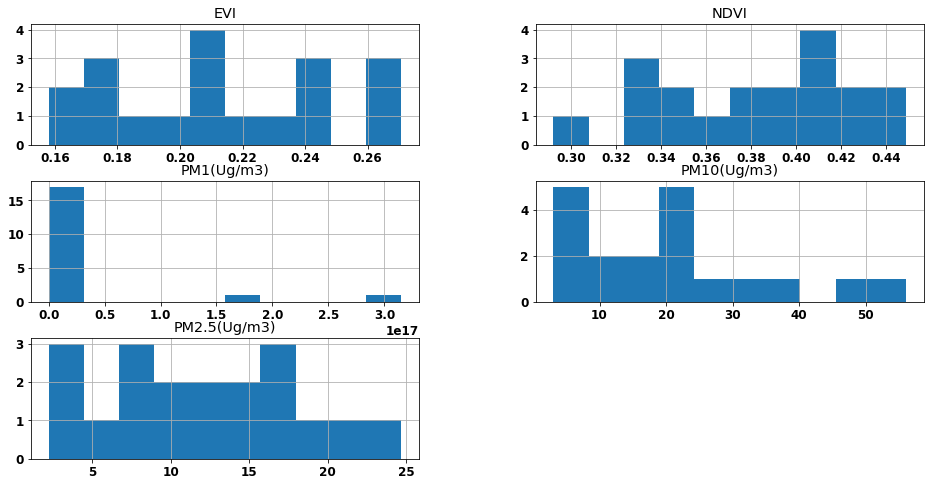

In [495]:
merged_monthly_airquality_vi_dataset_historgram = merged_monthly_airquality_vi_dataset.hist()
plt.savefig(os.path.join(filepath ,"merged_monthly_airquality_vi_dataset_historgram.png"))
plt.show()

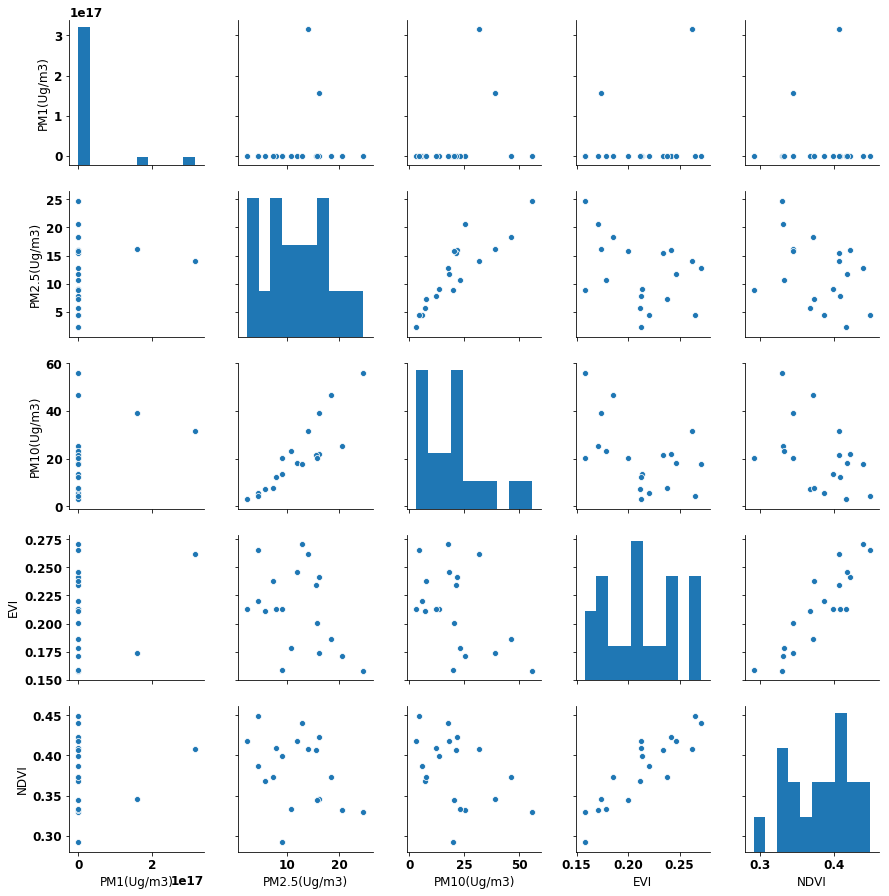

In [496]:
merged_monthly_airquality_vi_sns_plot= sns.pairplot(merged_monthly_airquality_vi_dataset)
plt.show()
merged_monthly_airquality_vi_sns_plot.savefig(os.path.join(filepath ,"merged_monthly_airquality_vi_sns_plot.png"))

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



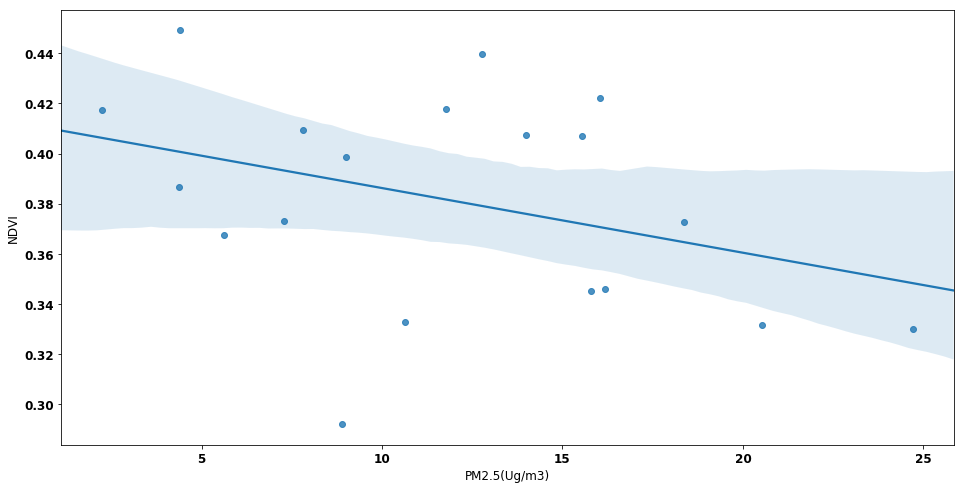

In [497]:
merged_monthly_pm25_ndvi = merged_monthly_airquality_vi_dataset[['PM2.5(Ug/m3)', 'NDVI']].copy()
merged_monthly_pm25_ndvi.head()
corr_plot = sns.regplot(merged_monthly_pm25_ndvi['PM2.5(Ug/m3)'], merged_monthly_pm25_ndvi['NDVI'])
corr_plot_figure = corr_plot.get_figure()    
corr_plot_figure.savefig(os.path.join(filepath ,"corr_pm25_vi_reg_plot.png"))

In [498]:
merged_monthly_pm25_ndvi.corr(method='pearson')

,PM2.5(Ug/m3),NDVI
PM2.5(Ug/m3),1.000000,-0.362199
NDVI,-0.362199,1.000000


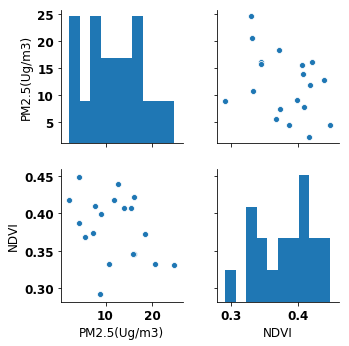

In [499]:
pm25_ndvi_sns_plot= sns.pairplot(merged_monthly_pm25_ndvi)
plt.show()
pm25_ndvi_sns_plot.savefig(os.path.join(filepath ,"monthly_pm25_vi_sns_plot.png"))

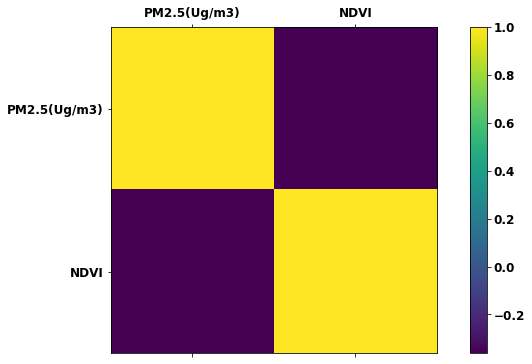

In [500]:
fig_corr_matrix = plt.figure(figsize=(12,6))
ax_fig_corr_matrix = fig_corr_matrix.add_subplot(111)
cax = ax_fig_corr_matrix.matshow(merged_monthly_pm25_ndvi.corr())
plt.xticks(range(len(merged_monthly_pm25_ndvi.columns)), merged_monthly_pm25_ndvi.columns)
plt.yticks(range(len(merged_monthly_pm25_ndvi.columns)),merged_monthly_pm25_ndvi.columns)
fig_corr_matrix.colorbar(cax)
plt.show()

fig_corr_matrix.savefig(os.path.join(filepath, 'monthly_pm25_vi_corr_matrix.png'))

### Combining the daily airquality dataset , daily meteorological dataset and greenness(VI) dataset
 - The vegetation indices are sampled on monthly basis, we upsampled them to get values for daily vi data

In [501]:
daily_airquality_data =  daily_average_airquality_data_concentrations
print(daily_airquality_data.shape)
daily_timestamp = daily_airquality_data.index.values
print(len(daily_timestamp))
daily_airquality_data["TimeStamp"] = daily_timestamp
print(daily_airquality_data.columns)
daily_airquality_data["TimeStamp"] = pd.to_datetime(daily_airquality_data["TimeStamp"])
print(daily_airquality_data.shape)

# month and year for merging with vi data
daily_airquality_data['MonthOfYear'] = pd.to_datetime(daily_timestamp).strftime('%m-%Y') 
daily_airquality_data.head()

(604, 3)
604
Index(['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'TimeStamp'], dtype='object')
(604, 4)


,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),TimeStamp,MonthOfYear
TimeStamp,,,,,
2017-09-04,6.790,8.080,11.250,2017-09-04,09-2017
2017-09-05,8.565,10.615,17.135,2017-09-05,09-2017
2017-09-06,8.565,10.615,17.135,2017-09-06,09-2017
2017-09-07,8.565,10.615,17.135,2017-09-07,09-2017
2017-09-08,8.565,10.615,17.135,2017-09-08,09-2017


In [502]:
daily_airquality_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),TimeStamp,MonthOfYear
TimeStamp,,,,,
2017-09-04,6.790,8.080,11.250,2017-09-04,09-2017
2017-09-05,8.565,10.615,17.135,2017-09-05,09-2017
2017-09-06,8.565,10.615,17.135,2017-09-06,09-2017
2017-09-07,8.565,10.615,17.135,2017-09-07,09-2017
2017-09-08,8.565,10.615,17.135,2017-09-08,09-2017


In [503]:
daily_meteorology_data =  daily_meteorological_data_with_out_missing_values
print(daily_meteorology_data.shape)
timestamp = daily_meteorology_data.index.values
print(len(timestamp))
daily_meteorology_data["TimeStamp"] = timestamp
print(daily_meteorology_data.columns)
daily_meteorology_data["TimeStamp"] = pd.to_datetime(daily_meteorology_data["TimeStamp"])
print(daily_meteorology_data.shape)

(554, 16)
554
Index(['average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)',
       'total radiation (W/m2)', 'average temperature (oC)',
       'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W', 'TimeStamp'],
      dtype='object')
(554, 17)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [504]:
daily_meteorology_data.head()

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W,TimeStamp
day,,,,,,,,,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,0.59,0.29,1.19,0,0,0,0,0,1,0,0,2017-09-09
2017-09-10,78.17,0.00,87.715,3575.39,21.91,0.60,0.31,1.41,0,0,1,0,0,0,0,0,2017-09-10
2017-09-11,75.27,1.77,87.657,4600.25,23.05,0.69,0.44,1.27,0,0,1,0,0,0,0,0,2017-09-11
2017-09-13,90.00,0.00,87.730,0.00,20.46,0.91,0.91,0.91,1,0,0,0,0,0,0,0,2017-09-13
2017-09-24,78.17,0.00,87.780,4839.53,22.02,0.88,0.30,1.63,0,0,0,0,0,1,0,0,2017-09-24


In [505]:
daily_meteorology_data

,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),average windspeed (m/s),min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W,TimeStamp
day,,,,,,,,,,,,,,,,,
2017-09-09,86.22,0.00,87.666,0.00,20.92,0.59,0.29,1.19,0,0,0,0,0,1,0,0,2017-09-09
2017-09-10,78.17,0.00,87.715,3575.39,21.91,0.60,0.31,1.41,0,0,1,0,0,0,0,0,2017-09-10
2017-09-11,75.27,1.77,87.657,4600.25,23.05,0.69,0.44,1.27,0,0,1,0,0,0,0,0,2017-09-11
2017-09-13,90.00,0.00,87.730,0.00,20.46,0.91,0.91,0.91,1,0,0,0,0,0,0,0,2017-09-13
2017-09-24,78.17,0.00,87.780,4839.53,22.02,0.88,0.30,1.63,0,0,0,0,0,1,0,0,2017-09-24
2017-09-25,80.21,7.88,87.627,4820.36,21.65,0.70,0.39,1.03,1,0,0,0,0,0,0,0,2017-09-25
2017-09-26,90.25,0.00,87.645,0.00,19.60,0.62,0.19,1.23,0,1,0,0,0,0,0,0,2017-09-26
2017-10-31,84.50,1.07,87.665,0.00,20.55,0.95,0.71,1.24,0,0,1,0,0,0,0,0,2017-10-31
2017-11-01,73.00,1.67,87.624,4707.15,23.25,0.69,0.32,1.38,0,0,0,0,0,1,0,0,2017-11-01


## merging vi  data to daily airquality data
   - to comeup with daily airquality data containing vi data

In [506]:
daily_combined_airquality_vi_dataset= pd.merge(daily_airquality_data, monthly_vi_data, on='MonthOfYear')

In [507]:
daily_combined_airquality_vi_dataset.head(3)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),TimeStamp,MonthOfYear,EVI,NDVI
0,6.790,8.080,11.250,2017-09-04,09-2017,0.2133,0.3988
1,8.565,10.615,17.135,2017-09-05,09-2017,0.2133,0.3988
2,8.565,10.615,17.135,2017-09-06,09-2017,0.2133,0.3988


In [508]:
daily_combined_airquality_vi_dataset.columns

Index(['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'TimeStamp', 'MonthOfYear',
       'EVI', 'NDVI'],
      dtype='object')

In [509]:
daily_merged_airquality_vi_dataset_of_interest= daily_combined_airquality_vi_dataset.drop(['MonthOfYear'], axis=1)
daily_merged_airquality_vi_dataset = daily_merged_airquality_vi_dataset_of_interest.set_index('TimeStamp')
daily_merged_airquality_vi_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI
TimeStamp,,,,,
2017-09-04,6.790,8.080,11.250,0.2133,0.3988
2017-09-05,8.565,10.615,17.135,0.2133,0.3988
2017-09-06,8.565,10.615,17.135,0.2133,0.3988
2017-09-07,8.565,10.615,17.135,0.2133,0.3988
2017-09-08,8.565,10.615,17.135,0.2133,0.3988


In [510]:
daily_merged_airquality_vi_dataset.tail()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI
TimeStamp,,,,,
2019-03-27,9.590,11.91,12.09,0.2376,0.3732
2019-03-28,20.970,29.09,32.64,0.2376,0.3732
2019-03-29,13.515,18.53,21.82,0.2376,0.3732
2019-03-30,6.060,7.97,11.00,0.2376,0.3732
2019-03-31,7.030,8.45,8.47,0.2376,0.3732


In [511]:
show_dataframe_info(daily_merged_airquality_vi_dataset)

(574, 5)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'EVI', 'NDVI']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 574 entries, 2017-09-04 to 2019-03-31
Data columns (total 5 columns):
PM1(Ug/m3)      574 non-null float64
PM2.5(Ug/m3)    574 non-null float64
PM10(Ug/m3)     574 non-null float64
EVI             574 non-null float64
NDVI            574 non-null float64
dtypes: float64(5)
memory usage: 26.9 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)      float64
PM2.5(Ug/m3)    float64
PM10(Ug/m3)     float64
EVI             float64
NDVI            float64
dtype: object


In [512]:
print(daily_meteorology_data.shape)

(554, 17)


In [513]:
daily_combined_dataset= pd.merge( daily_merged_airquality_vi_dataset,daily_meteorology_data, on='TimeStamp')

In [514]:
daily_combined_dataset.shape

(524, 22)

In [515]:
show_dataframe_info(daily_combined_dataset)

(524, 22)
['TimeStamp', 'PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'EVI', 'NDVI', 'average humidity (%)', 'total rainfall (mm)', 'average pressure (kPa)', 'total radiation (W/m2)', 'average temperature (oC)', 'average windspeed (m/s)', 'min windspeed (m/s)', 'max windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 523
Data columns (total 22 columns):
TimeStamp                   524 non-null datetime64[ns]
PM1(Ug/m3)                  524 non-null float64
PM2.5(Ug/m3)                524 non-null float64
PM10(Ug/m3)                 524 non-null float64
EVI                         524 non-null float64
NDVI                        524 non-null float64
average humidity (%)        524 non-null float64
total rainfall (mm)         524 non-null float64
average pressure (kPa)      524 non-null float64
total r

In [516]:
daily_combined_dataset.head(20)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),...,min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09,8.565000e+00,10.615,17.135,0.2133,0.3988,86.22,0.00,87.666,0.00,...,0.29,1.19,0,0,0,0,0,1,0,0
1,2017-09-10,8.565000e+00,10.615,17.135,0.2133,0.3988,78.17,0.00,87.715,3575.39,...,0.31,1.41,0,0,1,0,0,0,0,0
2,2017-09-11,8.565000e+00,10.615,17.135,0.2133,0.3988,75.27,1.77,87.657,4600.25,...,0.44,1.27,0,0,1,0,0,0,0,0
3,2017-09-13,8.565000e+00,10.615,17.135,0.2133,0.3988,90.00,0.00,87.730,0.00,...,0.91,0.91,1,0,0,0,0,0,0,0
4,2017-09-24,8.565000e+00,10.615,17.135,0.2133,0.3988,78.17,0.00,87.780,4839.53,...,0.30,1.63,0,0,0,0,0,1,0,0
5,2017-09-25,8.565000e+00,10.615,17.135,0.2133,0.3988,80.21,7.88,87.627,4820.36,...,0.39,1.03,1,0,0,0,0,0,0,0
6,2017-09-26,8.565000e+00,10.615,17.135,0.2133,0.3988,90.25,0.00,87.645,0.00,...,0.19,1.23,0,1,0,0,0,0,0,0
7,2017-10-31,9.432823e+17,29.000,74.760,0.2623,0.4073,84.50,1.07,87.665,0.00,...,0.71,1.24,0,0,1,0,0,0,0,0
8,2017-11-01,9.432823e+17,29.000,74.760,0.1736,0.3459,73.00,1.67,87.624,4707.15,...,0.32,1.38,0,0,0,0,0,1,0,0
9,2017-11-02,9.432823e+17,29.000,74.760,0.1736,0.3459,74.96,0.02,87.610,4683.44,...,0.22,1.28,0,0,0,0,0,0,0,1


### Remove the time column from combined dataset
- make timestamp  the index values

In [517]:
merged_daily_airquality_greenness_meteorological_dataset  = daily_combined_dataset.set_index('TimeStamp')
merged_daily_airquality_greenness_meteorological_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),EVI,NDVI,average humidity (%),total rainfall (mm),average pressure (kPa),total radiation (W/m2),average temperature (oC),...,min windspeed (m/s),max windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-09-09,8.565,10.615,17.135,0.2133,0.3988,86.22,0.00,87.666,0.00,20.92,...,0.29,1.19,0,0,0,0,0,1,0,0
2017-09-10,8.565,10.615,17.135,0.2133,0.3988,78.17,0.00,87.715,3575.39,21.91,...,0.31,1.41,0,0,1,0,0,0,0,0
2017-09-11,8.565,10.615,17.135,0.2133,0.3988,75.27,1.77,87.657,4600.25,23.05,...,0.44,1.27,0,0,1,0,0,0,0,0
2017-09-13,8.565,10.615,17.135,0.2133,0.3988,90.00,0.00,87.730,0.00,20.46,...,0.91,0.91,1,0,0,0,0,0,0,0
2017-09-24,8.565,10.615,17.135,0.2133,0.3988,78.17,0.00,87.780,4839.53,22.02,...,0.30,1.63,0,0,0,0,0,1,0,0


###  merging vi  data to hourly airquality and hourly meteorological data
   - to comeup with hourly airquality data containing vi data

In [518]:
hourly_meteorological_data_in_same_daterange_with_daily_airquality_data.head(4)

,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
dateTime,,,,,,,,,,,,,,
2017-09-09 18:00:00,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0


In [519]:
show_dataframe_info(hourly_meteorological_data_values)

(14288, 7)
['humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'winddirection', 'windspeed (m/s)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14288 entries, 2017-09-09 18:00:00 to 2019-06-15 02:00:00
Data columns (total 7 columns):
humidity (%)          14288 non-null int64
precipitation (mm)    14288 non-null float64
pressure (kPa)        14288 non-null float64
radiation (W/m2)      14288 non-null float64
temperature (oC)      14288 non-null float64
winddirection         14288 non-null object
windspeed (m/s)       14288 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 893.0+ KB

 dataframe info: 
 None

 dataframe column datatypes:
 humidity (%)            int64
precipitation (mm)    float64
pressure (kPa)        float64
radiation (W/m2)      float64
temperature (oC)      float64
winddirection          object
windspeed (m/s)       float64
dtype: object


In [520]:
hourly_average_airquality_data_concentrations.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour
TimeStamp,,,,,
2017-09-04 09:00:00,8.17,9.56,11.56,9,09:00:00
2017-09-04 10:00:00,7.09,8.34,11.65,10,10:00:00
2017-09-04 11:00:00,5.24,6.48,10.54,11,11:00:00
2017-09-04 12:00:00,7.38,9.48,16.24,12,12:00:00
2017-09-04 13:00:00,6.73,8.50,13.77,13,13:00:00


In [521]:
show_dataframe_info(hourly_average_airquality_data_concentrations)

(14473, 5)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'Hour']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14473 entries, 2017-09-04 09:00:00 to 2019-04-30 09:00:00
Freq: H
Data columns (total 5 columns):
PM1(Ug/m3)      14473 non-null float64
PM2.5(Ug/m3)    14473 non-null float64
PM10(Ug/m3)     14473 non-null float64
hour            14473 non-null int64
Hour            14473 non-null timedelta64[ns]
dtypes: float64(3), int64(1), timedelta64[ns](1)
memory usage: 678.4 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM1(Ug/m3)              float64
PM2.5(Ug/m3)            float64
PM10(Ug/m3)             float64
hour                      int64
Hour            timedelta64[ns]
dtype: object


In [522]:
hourly_airquality_data =  hourly_average_airquality_data_concentrations
print(hourly_airquality_data.shape)
hourly_timestamp = hourly_airquality_data.index.values
print(len(hourly_timestamp))
hourly_airquality_data["TimeStamp"] = hourly_timestamp
print(hourly_airquality_data.columns)
hourly_airquality_data["TimeStamp"] = pd.to_datetime(hourly_airquality_data["TimeStamp"])
print(hourly_airquality_data.shape)

# month and year for merging with vi data
hourly_airquality_data['MonthOfYear'] = pd.to_datetime(hourly_timestamp).strftime('%m-%Y') 
hourly_airquality_data.head()

(14473, 5)
14473
Index(['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'Hour',
       'TimeStamp'],
      dtype='object')
(14473, 6)


,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour,TimeStamp,MonthOfYear
TimeStamp,,,,,,,
2017-09-04 09:00:00,8.17,9.56,11.56,9,09:00:00,2017-09-04 09:00:00,09-2017
2017-09-04 10:00:00,7.09,8.34,11.65,10,10:00:00,2017-09-04 10:00:00,09-2017
2017-09-04 11:00:00,5.24,6.48,10.54,11,11:00:00,2017-09-04 11:00:00,09-2017
2017-09-04 12:00:00,7.38,9.48,16.24,12,12:00:00,2017-09-04 12:00:00,09-2017
2017-09-04 13:00:00,6.73,8.50,13.77,13,13:00:00,2017-09-04 13:00:00,09-2017


In [523]:
hourly_meteorology_data =  hourly_meteorological_data_in_same_daterange_with_daily_airquality_data
print(hourly_meteorology_data.shape)
hourly_timestamp = hourly_meteorology_data.index.values
#print(len(hourly_timestamp))
hourly_meteorology_data["TimeStamp"] = hourly_timestamp
#print(hourly_meteorology_data.columns)
hourly_meteorology_data["TimeStamp"] = pd.to_datetime(hourly_meteorology_data["TimeStamp"])
print(hourly_meteorology_data.shape)

(13191, 14)
(13191, 15)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [524]:
hourly_combined_airquality_vi_dataset= pd.merge(hourly_airquality_data, monthly_vi_data, on='MonthOfYear')
hourly_merged_airquality_vi_dataset_of_interest = hourly_combined_airquality_vi_dataset.drop(['MonthOfYear'], axis=1)
hourly_merged_airquality_vi_dataset = hourly_merged_airquality_vi_dataset_of_interest.set_index('TimeStamp')
hourly_merged_airquality_vi_dataset.head()
#hourly_combined_airquality_vi_dataset.head(3)

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour,EVI,NDVI
TimeStamp,,,,,,,
2017-09-04 09:00:00,8.17,9.56,11.56,9,09:00:00,0.2133,0.3988
2017-09-04 10:00:00,7.09,8.34,11.65,10,10:00:00,0.2133,0.3988
2017-09-04 11:00:00,5.24,6.48,10.54,11,11:00:00,0.2133,0.3988
2017-09-04 12:00:00,7.38,9.48,16.24,12,12:00:00,0.2133,0.3988
2017-09-04 13:00:00,6.73,8.50,13.77,13,13:00:00,0.2133,0.3988


In [525]:
hourly_combined_dataset= pd.merge(hourly_merged_airquality_vi_dataset,hourly_meteorology_data, on='TimeStamp')
merged_hourly_airquality_greenness_meteorological_dataset  = hourly_combined_dataset.set_index('TimeStamp')
merged_hourly_airquality_greenness_meteorological_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,Hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,5.52,6.93,9.73,18,18:00:00,0.2133,0.3988,73,0.0,87.50,...,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,7.89,9.97,14.24,19,19:00:00,0.2133,0.3988,77,0.0,87.58,...,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,9.55,12.09,16.99,20,20:00:00,0.2133,0.3988,80,0.0,87.67,...,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,10.09,12.97,18.97,21,21:00:00,0.2133,0.3988,82,0.0,87.66,...,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,9.66,12.53,18.17,22,22:00:00,0.2133,0.3988,87,0.0,87.68,...,20.86,0.29,0,0,1,0,0,0,0,0


In [526]:
#show_dataframe_info(hourly_combined_dataset)
merged_hourly_airquality_greenness_meteorological_dataset = merged_hourly_airquality_greenness_meteorological_dataset.drop(['Hour'], axis=1)
merged_hourly_airquality_greenness_meteorological_dataset.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,5.52,6.93,9.73,18,0.2133,0.3988,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,7.89,9.97,14.24,19,0.2133,0.3988,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,9.55,12.09,16.99,20,0.2133,0.3988,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,10.09,12.97,18.97,21,0.2133,0.3988,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,9.66,12.53,18.17,22,0.2133,0.3988,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


### Save the combined datasets to the respective folder.

In [527]:
merged_monthly_airquality_greenness_meteorological_dataset.to_csv(os.path.join(filepath , 'merged_monthly_airquality_greenness_meteorological_dataset.csv'))
merged_daily_airquality_greenness_meteorological_dataset.to_csv(os.path.join(filepath , 'merged_daily_airquality_greenness_meteorological_dataset.csv'))
merged_hourly_airquality_greenness_meteorological_dataset.to_csv(os.path.join(filepath , 'merged_hourly_airquality_greenness_meteorological_dataset.csv'))

### Feature Selection

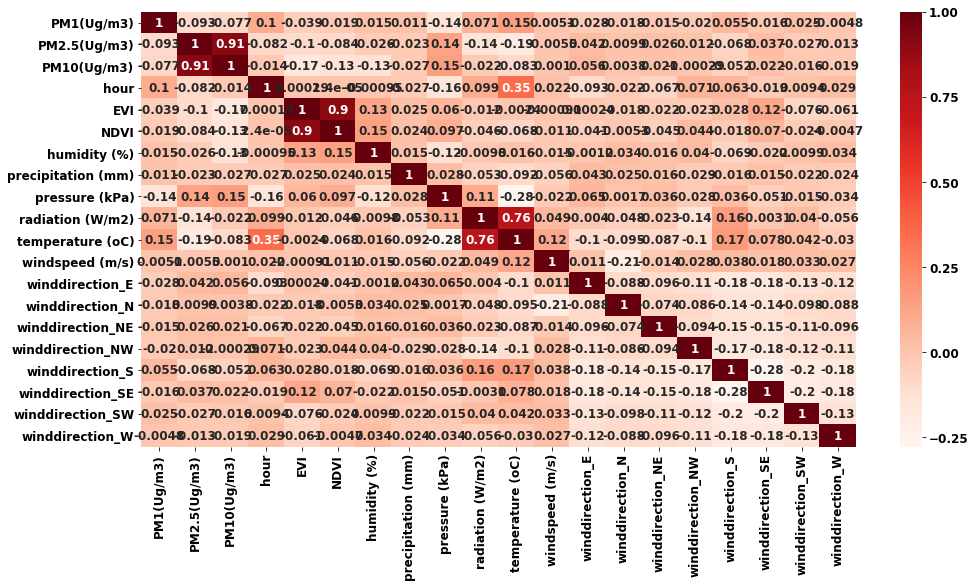

In [528]:
hourly_correlations = merged_hourly_airquality_greenness_meteorological_dataset.corr(method='pearson')
hourly_correlations.to_csv(os.path.join(filepath, 'hourly_correlations.csv'))

all_features_corr_plot = sns.heatmap(hourly_correlations, annot=True, cmap=plt.cm.Reds)
correlation_plot_figure = all_features_corr_plot.get_figure()    
correlation_plot_figure.savefig(os.path.join(filepath ,"correlation_pm25_heatmap_plot.png"))
plt.show()

In [529]:
#Correlation with output variable
correlation_target = abs(hourly_correlations['PM2.5(Ug/m3)']).sort_values(ascending=False)
#Selecting highly correlated features
relevant_features = correlation_target[correlation_target>0.5]
relevant_features

PM2.5(Ug/m3)    1.000000
PM10(Ug/m3)     0.909801
Name: PM2.5(Ug/m3), dtype: float64

In [530]:
correlation_target

PM2.5(Ug/m3)          1.000000
PM10(Ug/m3)           0.909801
temperature (oC)      0.190385
radiation (W/m2)      0.140729
pressure (kPa)        0.135512
EVI                   0.100509
PM1(Ug/m3)            0.092648
NDVI                  0.084159
hour                  0.082403
winddirection_S       0.068327
winddirection_E       0.042034
winddirection_SE      0.036573
winddirection_SW      0.026973
winddirection_NE      0.026034
humidity (%)          0.025926
precipitation (mm)    0.022988
winddirection_W       0.012684
winddirection_NW      0.012104
winddirection_N       0.009858
windspeed (m/s)       0.005517
Name: PM2.5(Ug/m3), dtype: float64